In [3]:
import numpy as np
#from lhereader import LHEReader

from LHCO_reader import LHCO_reader

import math
import os

# Plotting library
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

ImportError: No module named seaborn

In [ ]:
# PAPER MADGRAPH for the NLO corrections
# https://arxiv.org/pdf/1405.0301.pdf

## BACKGROUND

#### W gamma, W gamma jet (not dominant)

In [4]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_9_14/RUNS/Wino-rad-decay-bkg-Wgamma/LO/Auto_Results_LHCO/'
datFolder = '/media/andres/disco1tera/ubuntu/Trabajo/CompuTools/la-plata/Wino-radiative-decay/DATA/Wgamma/'

Wgamma_cross = 20.34
Wgamma_runs = 10
Wgamma_NLO_A = (7.124*10**1) / (2.954*10**1) #W+gamma
Wgamma_NLO_B = (3.713*10**1) / (2.546*10**1) #W+gamma+jet
Wgamma_NLO = (Wgamma_NLO_A * (7.124/(7.124+3.713)) ) + (Wgamma_NLO_B * (3.713/(7.124+3.713)) )

Wgamma_init_ev = 0
Wgamma_cut_ev = 0

Wgamma_photon = []
Wgamma_jet = []
Wgamma_lepton = []
Wgamma_MET = []
Wgamma_hadinfo = []



for ii in range(1,Wgamma_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(ii)+".lhco")
    
    Wgamma_init_ev += len(inputevents)
    
    for i in range(len(inputevents)):

        num_jets = 0
#        num_btag = 0
        HT_had = 0 # hadronic activity HT, defined as the scalar sum of the pT of all reconstructed jets

        
        # at least one: photon, jet and lepton (electron or muon)
        if inputevents[i].number()["photon"] > 0 and inputevents[i].number()["jet"] > 0 and (inputevents[i].number()["electron"] > 0 or inputevents[i].number()["muon"] > 0):
            
            if inputevents[i]["jet"][0]["PT"] > 100 and -5.0 < inputevents[i]["jet"][0]["eta"] < 5.0:
                
                if inputevents[i]["photon"][0]["PT"] > 10 and -2.5 < inputevents[i]["photon"][0]["eta"] < 2.5:
                    
                    # how many jets (total) and total hadronic pT
                    for j in range(inputevents[i].number()["jet"]):
                        if inputevents[i]["jet"][j]["PT"] > 20 and -5.0 < inputevents[i]["jet"][j]["eta"] < 5.0:
                            num_jets += 1
                            HT_had += inputevents[i]["jet"][j]["PT"]
                            
                    # save data        
#                     Wgamma_photon.append( [inputevents[i]["photon"][0]["PT"],inputevents[i]["photon"][0]["eta"],inputevents[i]["photon"][0]["phi"]] )
#                     Wgamma_jet.append( [inputevents[i]["jet"][0]["PT"],inputevents[i]["jet"][0]["eta"],inputevents[i]["jet"][0]["phi"]] )
#                     if inputevents[i].number()["electron"] > 0:
#                         Wgamma_lepton.append( [inputevents[i]["electron"][0]["PT"],inputevents[i]["electron"][0]["eta"],inputevents[i]["electron"][0]["phi"]] )
#                     else:
#                         Wgamma_lepton.append( [inputevents[i]["muon"][0]["PT"],inputevents[i]["muon"][0]["eta"],inputevents[i]["muon"][0]["phi"]] )
#                     Wgamma_MET.append( [inputevents[i]["MET"][0]["PT"],inputevents[i]["MET"][0]["eta"],inputevents[i]["MET"][0]["phi"]] )
#                     Wgamma_hadinfo.append( [HT, num_jets] )
                    
                            
                            
                    # photon info:
                    with open(datFolder+'photon.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["photon"][0]["PT"],inputevents[i]["photon"][0]["eta"],inputevents[i]["photon"][0]["phi"]))
                        
                    # jet info:
                    with open(datFolder+'jet.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["jet"][0]["PT"],inputevents[i]["jet"][0]["eta"],inputevents[i]["jet"][0]["phi"]))
                                
                    # lepton info
                    if inputevents[i].number()["electron"] > 0:
                        with open(datFolder+'lepton.dat', 'a') as f:
                            f.write('%f %f %f\n' % (inputevents[i]["electron"][0]["PT"],inputevents[i]["electron"][0]["eta"],inputevents[i]["electron"][0]["phi"]))
                    else:
                        with open(datFolder+'lepton.dat', 'a') as f:
                            f.write('%f %f %f\n' % (inputevents[i]["muon"][0]["PT"],inputevents[i]["muon"][0]["eta"],inputevents[i]["muon"][0]["phi"]))
                            
                    # MET (eta=0 by def, but I save phi because I have many jets)
                    with open(datFolder+'MET.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["MET"][0]["PT"],inputevents[i]["MET"][0]["eta"],inputevents[i]["MET"][0]["phi"]))
                                 
                    # hadronic info
                    with open(datFolder+'hadinfo.dat', 'a') as f:
                        f.write('%f %d\n' % (HT_had, num_jets))
                    
                    # total events that passed the cuts
                    Wgamma_cut_ev += 1



print('Num initial events: ', Wgamma_init_ev)
print('Total pasaron los cortes: ', Wgamma_cut_ev)

('Num initial events: ', 272946)
('Total pasaron los cortes: ', 16003)


In [5]:
cross = Wgamma_cross*1000*Wgamma_NLO
aceptancia = Wgamma_cut_ev/(1.*Wgamma_init_ev)
luminosidad = 139

Wgamma_fidcross = cross * aceptancia
Wgamma_expected = cross * aceptancia * luminosidad

print('fiducial cross section: ', Wgamma_fidcross)
print('Events expected: ', Wgamma_expected)

('fiducial cross section: ', 2486.497337761751)
('Events expected: ', 345623.12994888343)


#### W j j (dominant)

In [41]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_9_14/RUNS/Wino-rad-decay-bkg-Wjets-2/LO/Auto_Results_LHCO/'
datFolder = '/media/andres/disco1tera/ubuntu/Trabajo/CompuTools/la-plata/Wino-radiative-decay/DATA/Wjets/'

Wjets_cross = 387.0
Wjets_runs = 68
Wjets_NLO_A = (2.843*10**4) / (2.045*10**4) # W+jet
Wjets_NLO_B = (7.786*10**3) / (6.805*10**3) # W+jet+jet
Wjets_NLO = (Wjets_NLO_A * (28.43/(28.43+7.786)) ) + (Wjets_NLO_B * (7.786/(28.43+7.786)) )

Wjets_init_ev = 0
Wjets_cut_ev = 0

Wjets_photon = []
Wjets_jet = []
Wjets_lepton = []
Wjets_MET = []
Wjets_hadinfo = []



for ii in range(1,Wjets_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(ii)+".lhco")
    
    Wjets_init_ev += len(inputevents)
    
    for i in range(len(inputevents)):

        num_jets = 0
#        num_btag = 0
        HT_had = 0 # hadronic activity HT, defined as the scalar sum of the pT of all reconstructed jets

        
        # at least one: photon, jet and lepton (electron or muon)
        if inputevents[i].number()["photon"] > 0 and inputevents[i].number()["jet"] > 0 and (inputevents[i].number()["electron"] > 0 or inputevents[i].number()["muon"] > 0):
            
            if inputevents[i]["jet"][0]["PT"] > 100 and -5.0 < inputevents[i]["jet"][0]["eta"] < 5.0:
                
                if inputevents[i]["photon"][0]["PT"] > 10 and -2.5 < inputevents[i]["photon"][0]["eta"] < 2.5:
                    
                    # how many jets (total) and total hadronic pT
                    for j in range(inputevents[i].number()["jet"]):
                        if inputevents[i]["jet"][j]["PT"] > 20 and -5.0 < inputevents[i]["jet"][j]["eta"] < 5.0:
                            num_jets += 1
                            HT_had += inputevents[i]["jet"][j]["PT"]
                            
                    # save data        
#                     Wjets_photon.append( [inputevents[i]["photon"][0]["PT"],inputevents[i]["photon"][0]["eta"],inputevents[i]["photon"][0]["phi"]] )
#                     Wjets_jet.append( [inputevents[i]["jet"][0]["PT"],inputevents[i]["jet"][0]["eta"],inputevents[i]["jet"][0]["phi"]] )
#                     if inputevents[i].number()["electron"] > 0:
#                         Wjets_lepton.append( [inputevents[i]["electron"][0]["PT"],inputevents[i]["electron"][0]["eta"],inputevents[i]["electron"][0]["phi"]] )
#                     else:
#                         Wjets_lepton.append( [inputevents[i]["muon"][0]["PT"],inputevents[i]["muon"][0]["eta"],inputevents[i]["muon"][0]["phi"]] )
#                     Wjets_MET.append( [inputevents[i]["MET"][0]["PT"],inputevents[i]["MET"][0]["eta"],inputevents[i]["MET"][0]["phi"]] )
#                     Wjets_hadinfo.append( [HT, num_jets] )
                    
                            
                            
                    # photon info:
                    with open(datFolder+'photon.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["photon"][0]["PT"],inputevents[i]["photon"][0]["eta"],inputevents[i]["photon"][0]["phi"]))
                        
                    # jet info:
                    with open(datFolder+'jet.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["jet"][0]["PT"],inputevents[i]["jet"][0]["eta"],inputevents[i]["jet"][0]["phi"]))
                                
                    # lepton info
                    if inputevents[i].number()["electron"] > 0:
                        with open(datFolder+'lepton.dat', 'a') as f:
                            f.write('%f %f %f\n' % (inputevents[i]["electron"][0]["PT"],inputevents[i]["electron"][0]["eta"],inputevents[i]["electron"][0]["phi"]))
                    else:
                        with open(datFolder+'lepton.dat', 'a') as f:
                            f.write('%f %f %f\n' % (inputevents[i]["muon"][0]["PT"],inputevents[i]["muon"][0]["eta"],inputevents[i]["muon"][0]["phi"]))
                            
                    # MET (eta=0 by def, but I save phi because I have many jets)
                    with open(datFolder+'MET.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["MET"][0]["PT"],inputevents[i]["MET"][0]["eta"],inputevents[i]["MET"][0]["phi"]))
                                 
                    # hadronic info
                    with open(datFolder+'hadinfo.dat', 'a') as f:
                        f.write('%f %d\n' % (HT_had, num_jets))
                    
                    # total events that passed the cuts
                    Wjets_cut_ev += 1



print('Num initial events: ', Wjets_init_ev)
print('Total pasaron los cortes: ', Wjets_cut_ev)

('Num initial events: ', 1853682)
('Total pasaron los cortes: ', 13692)


In [42]:
cross = Wjets_cross*1000*Wjets_NLO
aceptancia = Wjets_cut_ev/(1.*Wjets_init_ev)
luminosidad = 139

Wjets_fidcross = cross * aceptancia
Wjets_expected = cross * aceptancia * luminosidad

print('fiducial cross section: ', Wjets_fidcross)
print('Events expected: ', Wjets_expected)

('fiducial cross section: ', 3822.7677506632535)
('Events expected: ', 531364.7173421922)


#### t t gamma, t t gamma j

In [8]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_9_14/RUNS/Wino-rad-decay-bkg-ttgamma-2/LO/Auto_Results_LHCO/'
datFolder = '/media/andres/disco1tera/ubuntu/Trabajo/CompuTools/la-plata/Wino-radiative-decay/DATA/ttgamma/'

ttgamma_cross = 0.172
ttgamma_runs = 15
ttgamma_NLO_A = (1.744 *10**0) / (1.204*10**0) #tt+gamma
ttgamma_NLO_B = (1.135*10**0) / (0.8726*10**0) #tt+gamma+jet
ttgamma_NLO = (ttgamma_NLO_A * (1.744/(1.744+1.135)) ) + (ttgamma_NLO_B * (1.135/(1.744+1.135)) )

ttgamma_init_ev = 0
ttgamma_cut_ev = 0

ttgamma_photon = []
ttgamma_jet = []
ttgamma_lepton = []
ttgamma_MET = []
ttgamma_hadinfo = []



for ii in range(1,ttgamma_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(ii)+".lhco")
    
    ttgamma_init_ev += len(inputevents)
    
    for i in range(len(inputevents)):

        num_jets = 0
#        num_btag = 0
        HT_had = 0 # hadronic activity HT, defined as the scalar sum of the pT of all reconstructed jets

        
        # at least one: photon, jet and lepton (electron or muon)
        if inputevents[i].number()["photon"] > 0 and inputevents[i].number()["jet"] > 0 and (inputevents[i].number()["electron"] > 0 or inputevents[i].number()["muon"] > 0):
            
            if inputevents[i]["jet"][0]["PT"] > 100 and -5.0 < inputevents[i]["jet"][0]["eta"] < 5.0:
                
                if inputevents[i]["photon"][0]["PT"] > 10 and -2.5 < inputevents[i]["photon"][0]["eta"] < 2.5:
                    
                    # how many jets (total) and total hadronic pT
                    for j in range(inputevents[i].number()["jet"]):
                        if inputevents[i]["jet"][j]["PT"] > 20 and -5.0 < inputevents[i]["jet"][j]["eta"] < 5.0:
                            num_jets += 1
                            HT_had += inputevents[i]["jet"][j]["PT"]
                            
                    # save data        
#                     ttgamma_photon.append( [inputevents[i]["photon"][0]["PT"],inputevents[i]["photon"][0]["eta"],inputevents[i]["photon"][0]["phi"]] )
#                     ttgamma_jet.append( [inputevents[i]["jet"][0]["PT"],inputevents[i]["jet"][0]["eta"],inputevents[i]["jet"][0]["phi"]] )
#                     if inputevents[i].number()["electron"] > 0:
#                         ttgamma_lepton.append( [inputevents[i]["electron"][0]["PT"],inputevents[i]["electron"][0]["eta"],inputevents[i]["electron"][0]["phi"]] )
#                     else:
#                         ttgamma_lepton.append( [inputevents[i]["muon"][0]["PT"],inputevents[i]["muon"][0]["eta"],inputevents[i]["muon"][0]["phi"]] )
#                     ttgamma_MET.append( [inputevents[i]["MET"][0]["PT"],inputevents[i]["MET"][0]["eta"],inputevents[i]["MET"][0]["phi"]] )
#                     ttgamma_hadinfo.append( [HT, num_jets] )
                    
                            
                            
                    # photon info:
                    with open(datFolder+'photon.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["photon"][0]["PT"],inputevents[i]["photon"][0]["eta"],inputevents[i]["photon"][0]["phi"]))
                        
                    # jet info:
                    with open(datFolder+'jet.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["jet"][0]["PT"],inputevents[i]["jet"][0]["eta"],inputevents[i]["jet"][0]["phi"]))
                                
                    # lepton info
                    if inputevents[i].number()["electron"] > 0:
                        with open(datFolder+'lepton.dat', 'a') as f:
                            f.write('%f %f %f\n' % (inputevents[i]["electron"][0]["PT"],inputevents[i]["electron"][0]["eta"],inputevents[i]["electron"][0]["phi"]))
                    else:
                        with open(datFolder+'lepton.dat', 'a') as f:
                            f.write('%f %f %f\n' % (inputevents[i]["muon"][0]["PT"],inputevents[i]["muon"][0]["eta"],inputevents[i]["muon"][0]["phi"]))
                            
                    # MET (eta=0 by def, but I save phi because I have many jets)
                    with open(datFolder+'MET.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["MET"][0]["PT"],inputevents[i]["MET"][0]["eta"],inputevents[i]["MET"][0]["phi"]))
                                 
                    # hadronic info
                    with open(datFolder+'hadinfo.dat', 'a') as f:
                        f.write('%f %d\n' % (HT_had, num_jets))
                    
                    # total events that passed the cuts
                    ttgamma_cut_ev += 1



print('Num initial events: ', ttgamma_init_ev)
print('Total pasaron los cortes: ', ttgamma_cut_ev)

('Num initial events: ', 440467)
('Total pasaron los cortes: ', 144328)


In [9]:
cross = ttgamma_cross*1000*ttgamma_NLO
aceptancia = ttgamma_cut_ev/(1.*ttgamma_init_ev)
luminosidad = 139

ttgamma_fidcross = cross * aceptancia
ttgamma_expected = cross * aceptancia * luminosidad

print('fiducial cross section: ', ttgamma_fidcross)
print('Events expected: ', ttgamma_expected)

('fiducial cross section: ', 78.35293071648898)
('Events expected: ', 10891.057369591968)


## SIGNAL

In [174]:
0.048*0.36*0.22

0.0038016

In [10]:
Folder = '/media/andres/disco1tera/ubuntu/Programas/MG5_aMC_v2_9_14/RUNS/Wino-radiative-decay/LO/Auto_Results_LHCO/'
datFolder = '/media/andres/disco1tera/ubuntu/Trabajo/CompuTools/la-plata/Wino-radiative-decay/DATA/Wino/'

Wino_cross = 0.048*0.36*0.22 #0.00437*0.36
Wino_runs = 9

Wino_init_ev = 0
Wino_cut_ev = 0

Wino_photon = []
Wino_jet = []
Wino_lepton = []
Wino_MET = []
Wino_hadinfo = []



for ii in range(1,Wino_runs+1):
    
    inputevents = LHCO_reader.Events(f_name=Folder+"run_0"+str(ii)+".lhco")
    
    Wino_init_ev += len(inputevents)
    
    for i in range(len(inputevents)):

        num_jets = 0
#        num_btag = 0
        HT_had = 0 # hadronic activity HT, defined as the scalar sum of the pT of all reconstructed jets

        
        # at least one: photon, jet and lepton (electron or muon)
        if inputevents[i].number()["photon"] > 0 and inputevents[i].number()["jet"] > 0 and (inputevents[i].number()["electron"] > 0 or inputevents[i].number()["muon"] > 0):
            
            if inputevents[i]["jet"][0]["PT"] > 100 and -5.0 < inputevents[i]["jet"][0]["eta"] < 5.0:
                
                if inputevents[i]["photon"][0]["PT"] > 10 and -2.5 < inputevents[i]["photon"][0]["eta"] < 2.5:
                    
                    # how many jets (total) and total hadronic pT
                    for j in range(inputevents[i].number()["jet"]):
                        if inputevents[i]["jet"][j]["PT"] > 20 and -5.0 < inputevents[i]["jet"][j]["eta"] < 5.0:
                            num_jets += 1
                            HT_had += inputevents[i]["jet"][j]["PT"]
                            
                    # save data        
#                     Wino_photon.append( [inputevents[i]["photon"][0]["PT"],inputevents[i]["photon"][0]["eta"],inputevents[i]["photon"][0]["phi"]] )
#                     Wino_jet.append( [inputevents[i]["jet"][0]["PT"],inputevents[i]["jet"][0]["eta"],inputevents[i]["jet"][0]["phi"]] )
#                     if inputevents[i].number()["electron"] > 0:
#                         Wino_lepton.append( [inputevents[i]["electron"][0]["PT"],inputevents[i]["electron"][0]["eta"],inputevents[i]["electron"][0]["phi"]] )
#                     else:
#                         Wino_lepton.append( [inputevents[i]["muon"][0]["PT"],inputevents[i]["muon"][0]["eta"],inputevents[i]["muon"][0]["phi"]] )
#                     Wino_MET.append( [inputevents[i]["MET"][0]["PT"],inputevents[i]["MET"][0]["eta"],inputevents[i]["MET"][0]["phi"]] )
#                     Wino_hadinfo.append( [HT, num_jets] )
                    
                            
                            
                    # photon info:
                    with open(datFolder+'photon.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["photon"][0]["PT"],inputevents[i]["photon"][0]["eta"],inputevents[i]["photon"][0]["phi"]))
                        
                    # jet info:
                    with open(datFolder+'jet.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["jet"][0]["PT"],inputevents[i]["jet"][0]["eta"],inputevents[i]["jet"][0]["phi"]))
                                
                    # lepton info
                    if inputevents[i].number()["electron"] > 0:
                        with open(datFolder+'lepton.dat', 'a') as f:
                            f.write('%f %f %f\n' % (inputevents[i]["electron"][0]["PT"],inputevents[i]["electron"][0]["eta"],inputevents[i]["electron"][0]["phi"]))
                    else:
                        with open(datFolder+'lepton.dat', 'a') as f:
                            f.write('%f %f %f\n' % (inputevents[i]["muon"][0]["PT"],inputevents[i]["muon"][0]["eta"],inputevents[i]["muon"][0]["phi"]))
                            
                    # MET (eta=0 by def, but I save phi because I have many jets)
                    with open(datFolder+'MET.dat', 'a') as f:
                        f.write('%f %f %f\n' % (inputevents[i]["MET"][0]["PT"],inputevents[i]["MET"][0]["eta"],inputevents[i]["MET"][0]["phi"]))
                                 
                    # hadronic info
                    with open(datFolder+'hadinfo.dat', 'a') as f:
                        f.write('%f %d\n' % (HT_had, num_jets))
                    
                    # total events that passed the cuts
                    Wino_cut_ev += 1



print('Num initial events: ', Wino_init_ev)
print('Total pasaron los cortes: ', Wino_cut_ev)

('Num initial events: ', 450000)
('Total pasaron los cortes: ', 151496)


In [11]:
cross = Wino_cross*1000
aceptancia = Wino_cut_ev/(1.*Wino_init_ev)
luminosidad = 139

Wino_fidcross = cross * aceptancia
Wino_expected = cross * aceptancia * luminosidad

print('fiducial cross section: ', Wino_fidcross)
print('Events expected: ', Wino_expected)

('fiducial cross section: ', 1.279838208)
('Events expected: ', 177.897510912)


## LOAD THE DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm


from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate


import xgboost
from xgboost import XGBRegressor, XGBClassifier

In [116]:
Wgamma_fidcross = 2486.497337761751

In [117]:
Wjets_fidcross = 3822.7677506632535

In [118]:
ttgamma_fidcross = 78.35293071648898

In [119]:
B_fidcross_tot = Wgamma_fidcross + Wjets_fidcross + ttgamma_fidcross
B_fidcross_tot

6387.618019141494

In [120]:

sample = 22800 # # of signal and background events to plot their distributions

Wgamma_sample = int(round(sample*Wgamma_fidcross/B_fidcross_tot))
Wjets_sample = int(round(sample*Wjets_fidcross/B_fidcross_tot))
ttgamma_sample = int(round(sample*ttgamma_fidcross/B_fidcross_tot))

print(Wgamma_sample)
print(Wjets_sample)
print(ttgamma_sample)

8875
13645
280


In [121]:
##############
# input data #
##############

# photon -> (pT, eta, phi) from the leading photon
# jet -> (pT, eta, phi) from the leading jet
# lepton -> (pT, eta, phi) from the lepton (electron or muon)
# MET -> (pT, eta, phi) eta = 0 by construction, but phi is important because we have a lot of jets that we do not use
# hadinfo -> (HT, num_jets)  HT: sum PT of all the jets, number of jets (b-tag or not)


######
# SM #
######

# W gamma + W gamma jet #
# Dominant #

datFolderWgamma = '/media/andres/disco1tera/ubuntu/Trabajo/CompuTools/la-plata/Wino-radiative-decay/DATA/Wgamma/'

photon_Wgamma = np.loadtxt(datFolderWgamma + 'photon.dat', delimiter=' ')
jet_Wgamma = np.loadtxt(datFolderWgamma + 'jet.dat', delimiter=' ')
lepton_Wgamma = np.loadtxt(datFolderWgamma + 'lepton.dat', delimiter=' ')
MET_Wgamma = np.loadtxt(datFolderWgamma + 'MET.dat', delimiter=' ')
hadinfo_Wgamma = np.loadtxt(datFolderWgamma + 'hadinfo.dat', delimiter=' ')


# W jet + W jet jet #

datFolderWjets = '/media/andres/disco1tera/ubuntu/Trabajo/CompuTools/la-plata/Wino-radiative-decay/DATA/Wjets/'

photon_Wjets = np.loadtxt(datFolderWjets + 'photon.dat', delimiter=' ')
jet_Wjets = np.loadtxt(datFolderWjets + 'jet.dat', delimiter=' ')
lepton_Wjets = np.loadtxt(datFolderWjets + 'lepton.dat', delimiter=' ')
MET_Wjets = np.loadtxt(datFolderWjets + 'MET.dat', delimiter=' ')
hadinfo_Wjets = np.loadtxt(datFolderWjets + 'hadinfo.dat', delimiter=' ')


# tt gamma + tt gamma jet #

datFolderttgamma = '/media/andres/disco1tera/ubuntu/Trabajo/CompuTools/la-plata/Wino-radiative-decay/DATA/ttgamma/'

photon_ttgamma = np.loadtxt(datFolderttgamma + 'photon.dat', delimiter=' ')
jet_ttgamma = np.loadtxt(datFolderttgamma + 'jet.dat', delimiter=' ')
lepton_ttgamma = np.loadtxt(datFolderttgamma + 'lepton.dat', delimiter=' ')
MET_ttgamma = np.loadtxt(datFolderttgamma + 'MET.dat', delimiter=' ')
hadinfo_ttgamma = np.loadtxt(datFolderttgamma + 'hadinfo.dat', delimiter=' ')


photon_SM = np.concatenate([photon_Wgamma[:Wgamma_sample], photon_Wjets[:Wjets_sample], photon_ttgamma[:ttgamma_sample]])
jet_SM = np.concatenate([jet_Wgamma[:Wgamma_sample], jet_Wjets[:Wjets_sample], jet_ttgamma[:ttgamma_sample]]) 
lepton_SM = np.concatenate([lepton_Wgamma[:Wgamma_sample], lepton_Wjets[:Wjets_sample], lepton_ttgamma[:ttgamma_sample]])
MET_SM = np.concatenate([MET_Wgamma[:Wgamma_sample], MET_Wjets[:Wjets_sample], MET_ttgamma[:ttgamma_sample]])
hadinfo_SM = np.concatenate([hadinfo_Wgamma[:Wgamma_sample], hadinfo_Wjets[:Wjets_sample], hadinfo_ttgamma[:ttgamma_sample]])


######
# NP #
######

datFolderNP = '/media/andres/disco1tera/ubuntu/Trabajo/CompuTools/la-plata/Wino-radiative-decay/DATA/Wino/'

photon_NP = np.loadtxt(datFolderNP + 'photon.dat', delimiter=' ')
jet_NP = np.loadtxt(datFolderNP + 'jet.dat', delimiter=' ')
lepton_NP = np.loadtxt(datFolderNP + 'lepton.dat', delimiter=' ')
MET_NP = np.loadtxt(datFolderNP + 'MET.dat', delimiter=' ')
hadinfo_NP = np.loadtxt(datFolderNP + 'hadinfo.dat', delimiter=' ')



# same number of events for signal and background
min_evs = min(len(photon_SM),len(photon_NP))

photon_SM = photon_SM[:min_evs]
jet_SM = jet_SM[:min_evs]
lepton_SM = lepton_SM[:min_evs]
MET_SM = MET_SM[:min_evs]
hadinfo_SM = hadinfo_SM[:min_evs]

photon_NP = photon_NP[:min_evs]
jet_NP = jet_NP[:min_evs]
lepton_NP = lepton_NP[:min_evs]
MET_NP = MET_NP[:min_evs]
hadinfo_NP = hadinfo_NP[:min_evs]







# other variables, individual channels:

HT_main_Wgamma = photon_Wgamma[:,0]+lepton_Wgamma[:,0]+jet_Wgamma[:,0]

MET_sig_Wgamma = np.divide( MET_Wgamma[:,0],np.sqrt(HT_main_Wgamma) )

m_eff_Wgamma = MET_Wgamma[:,0] + photon_Wgamma[:,0]+lepton_Wgamma[:,0]+jet_Wgamma[:,0]

phi_MET_photon_Wgamma = np.absolute( MET_Wgamma[:,2] - photon_Wgamma[:,2] )
phi_MET_jet_Wgamma = np.absolute( MET_Wgamma[:,2] - jet_Wgamma[:,2] )
phi_MET_lepton_Wgamma = np.absolute( MET_Wgamma[:,2] - lepton_Wgamma[:,2] )

mT_photon_Wgamma = np.sqrt( (2*photon_Wgamma[:,0]*MET_Wgamma[:,0]) * (1 - np.cos(phi_MET_photon_Wgamma)) )
mT_jet_Wgamma = np.sqrt( (2*jet_Wgamma[:,0]*MET_Wgamma[:,0]) * (1 - np.cos(phi_MET_jet_Wgamma)) )
mT_lepton_Wgamma = np.sqrt( (2*lepton_Wgamma[:,0]*MET_Wgamma[:,0]) * (1 - np.cos(phi_MET_lepton_Wgamma)) )

phi_photon_jet_Wgamma = np.absolute( photon_Wgamma[:,2] - jet_Wgamma[:,2] )
phi_photon_lepton_Wgamma = np.absolute( photon_Wgamma[:,2] - lepton_Wgamma[:,2] )
phi_lepton_jet_Wgamma = np.absolute( lepton_Wgamma[:,2] - jet_Wgamma[:,2] )

phi_photon_jet_Wgamma[phi_photon_jet_Wgamma>np.pi] = (2.* np.pi) - phi_photon_jet_Wgamma[phi_photon_jet_Wgamma>np.pi]
phi_photon_lepton_Wgamma[phi_photon_lepton_Wgamma>np.pi] = (2.* np.pi) - phi_photon_lepton_Wgamma[phi_photon_lepton_Wgamma>np.pi]
phi_lepton_jet_Wgamma[phi_lepton_jet_Wgamma>np.pi] = (2.* np.pi) - phi_lepton_jet_Wgamma[phi_lepton_jet_Wgamma>np.pi]

deltaR_photon_jet_Wgamma = np.sqrt( (photon_Wgamma[:,1]-jet_Wgamma[:,1])**2 + (phi_photon_jet_Wgamma)**2 )
deltaR_photon_lepton_Wgamma = np.sqrt( (photon_Wgamma[:,1]-lepton_Wgamma[:,1])**2 + (phi_photon_lepton_Wgamma)**2 )
deltaR_lepton_jet_Wgamma = np.sqrt( (lepton_Wgamma[:,1]-jet_Wgamma[:,1])**2 + (phi_lepton_jet_Wgamma)**2 )




HT_main_Wjets = photon_Wjets[:,0]+lepton_Wjets[:,0]+jet_Wjets[:,0]

MET_sig_Wjets = np.divide( MET_Wjets[:,0],np.sqrt(HT_main_Wjets) )

m_eff_Wjets = MET_Wjets[:,0] + photon_Wjets[:,0]+lepton_Wjets[:,0]+jet_Wjets[:,0]

phi_MET_photon_Wjets = np.absolute( MET_Wjets[:,2] - photon_Wjets[:,2] )
phi_MET_jet_Wjets = np.absolute( MET_Wjets[:,2] - jet_Wjets[:,2] )
phi_MET_lepton_Wjets = np.absolute( MET_Wjets[:,2] - lepton_Wjets[:,2] )

mT_photon_Wjets = np.sqrt( (2*photon_Wjets[:,0]*MET_Wjets[:,0]) * (1 - np.cos(phi_MET_photon_Wjets)) )
mT_jet_Wjets = np.sqrt( (2*jet_Wjets[:,0]*MET_Wjets[:,0]) * (1 - np.cos(phi_MET_jet_Wjets)) )
mT_lepton_Wjets = np.sqrt( (2*lepton_Wjets[:,0]*MET_Wjets[:,0]) * (1 - np.cos(phi_MET_lepton_Wjets)) )

phi_photon_jet_Wjets = np.absolute( photon_Wjets[:,2] - jet_Wjets[:,2] )
phi_photon_lepton_Wjets = np.absolute( photon_Wjets[:,2] - lepton_Wjets[:,2] )
phi_lepton_jet_Wjets = np.absolute( lepton_Wjets[:,2] - jet_Wjets[:,2] )

phi_photon_jet_Wjets[phi_photon_jet_Wjets>np.pi] = (2.* np.pi) - phi_photon_jet_Wjets[phi_photon_jet_Wjets>np.pi]
phi_photon_lepton_Wjets[phi_photon_lepton_Wjets>np.pi] = (2.* np.pi) - phi_photon_lepton_Wjets[phi_photon_lepton_Wjets>np.pi]
phi_lepton_jet_Wjets[phi_lepton_jet_Wjets>np.pi] = (2.* np.pi) - phi_lepton_jet_Wjets[phi_lepton_jet_Wjets>np.pi]

deltaR_photon_jet_Wjets = np.sqrt( (photon_Wjets[:,1]-jet_Wjets[:,1])**2 + (phi_photon_jet_Wjets)**2 )
deltaR_photon_lepton_Wjets = np.sqrt( (photon_Wjets[:,1]-lepton_Wjets[:,1])**2 + (phi_photon_lepton_Wjets)**2 )
deltaR_lepton_jet_Wjets = np.sqrt( (lepton_Wjets[:,1]-jet_Wjets[:,1])**2 + (phi_lepton_jet_Wjets)**2 )



HT_main_ttgamma = photon_ttgamma[:,0]+lepton_ttgamma[:,0]+jet_ttgamma[:,0]

MET_sig_ttgamma = np.divide( MET_ttgamma[:,0],np.sqrt(HT_main_ttgamma) )

m_eff_ttgamma = MET_ttgamma[:,0] + photon_ttgamma[:,0]+lepton_ttgamma[:,0]+jet_ttgamma[:,0]

phi_MET_photon_ttgamma = np.absolute( MET_ttgamma[:,2] - photon_ttgamma[:,2] )
phi_MET_jet_ttgamma = np.absolute( MET_ttgamma[:,2] - jet_ttgamma[:,2] )
phi_MET_lepton_ttgamma = np.absolute( MET_ttgamma[:,2] - lepton_ttgamma[:,2] )

mT_photon_ttgamma = np.sqrt( (2*photon_ttgamma[:,0]*MET_ttgamma[:,0]) * (1 - np.cos(phi_MET_photon_ttgamma)) )
mT_jet_ttgamma = np.sqrt( (2*jet_ttgamma[:,0]*MET_ttgamma[:,0]) * (1 - np.cos(phi_MET_jet_ttgamma)) )
mT_lepton_ttgamma = np.sqrt( (2*lepton_ttgamma[:,0]*MET_ttgamma[:,0]) * (1 - np.cos(phi_MET_lepton_ttgamma)) )

phi_photon_jet_ttgamma = np.absolute( photon_ttgamma[:,2] - jet_ttgamma[:,2] )
phi_photon_lepton_ttgamma = np.absolute( photon_ttgamma[:,2] - lepton_ttgamma[:,2] )
phi_lepton_jet_ttgamma = np.absolute( lepton_ttgamma[:,2] - jet_ttgamma[:,2] )

phi_photon_jet_ttgamma[phi_photon_jet_ttgamma>np.pi] = (2.* np.pi) - phi_photon_jet_ttgamma[phi_photon_jet_ttgamma>np.pi]
phi_photon_lepton_ttgamma[phi_photon_lepton_ttgamma>np.pi] = (2.* np.pi) - phi_photon_lepton_ttgamma[phi_photon_lepton_ttgamma>np.pi]
phi_lepton_jet_ttgamma[phi_lepton_jet_ttgamma>np.pi] = (2.* np.pi) - phi_lepton_jet_ttgamma[phi_lepton_jet_ttgamma>np.pi]

deltaR_photon_jet_ttgamma = np.sqrt( (photon_ttgamma[:,1]-jet_ttgamma[:,1])**2 + (phi_photon_jet_ttgamma)**2 )
deltaR_photon_lepton_ttgamma = np.sqrt( (photon_ttgamma[:,1]-lepton_ttgamma[:,1])**2 + (phi_photon_lepton_ttgamma)**2 )
deltaR_lepton_jet_ttgamma = np.sqrt( (lepton_ttgamma[:,1]-jet_ttgamma[:,1])**2 + (phi_lepton_jet_ttgamma)**2 )



# other variables

HT_main_SM = photon_SM[:,0]+lepton_SM[:,0]+jet_SM[:,0]

MET_sig_SM = np.divide( MET_SM[:,0],np.sqrt(HT_main_SM) )

m_eff_SM = MET_SM[:,0] + photon_SM[:,0]+lepton_SM[:,0]+jet_SM[:,0]

phi_MET_photon_SM = np.absolute( MET_SM[:,2] - photon_SM[:,2] )
phi_MET_jet_SM = np.absolute( MET_SM[:,2] - jet_SM[:,2] )
phi_MET_lepton_SM = np.absolute( MET_SM[:,2] - lepton_SM[:,2] )

mT_photon_SM = np.sqrt( (2*photon_SM[:,0]*MET_SM[:,0]) * (1 - np.cos(phi_MET_photon_SM)) )
mT_jet_SM = np.sqrt( (2*jet_SM[:,0]*MET_SM[:,0]) * (1 - np.cos(phi_MET_jet_SM)) )
mT_lepton_SM = np.sqrt( (2*lepton_SM[:,0]*MET_SM[:,0]) * (1 - np.cos(phi_MET_lepton_SM)) )

phi_photon_jet_SM = np.absolute( photon_SM[:,2] - jet_SM[:,2] )
phi_photon_lepton_SM = np.absolute( photon_SM[:,2] - lepton_SM[:,2] )
phi_lepton_jet_SM = np.absolute( lepton_SM[:,2] - jet_SM[:,2] )

phi_photon_jet_SM[phi_photon_jet_SM>np.pi] = (2.* np.pi) - phi_photon_jet_SM[phi_photon_jet_SM>np.pi]
phi_photon_lepton_SM[phi_photon_lepton_SM>np.pi] = (2.* np.pi) - phi_photon_lepton_SM[phi_photon_lepton_SM>np.pi]
phi_lepton_jet_SM[phi_lepton_jet_SM>np.pi] = (2.* np.pi) - phi_lepton_jet_SM[phi_lepton_jet_SM>np.pi]

deltaR_photon_jet_SM = np.sqrt( (photon_SM[:,1]-jet_SM[:,1])**2 + (phi_photon_jet_SM)**2 )
deltaR_photon_lepton_SM = np.sqrt( (photon_SM[:,1]-lepton_SM[:,1])**2 + (phi_photon_lepton_SM)**2 )
deltaR_lepton_jet_SM = np.sqrt( (lepton_SM[:,1]-jet_SM[:,1])**2 + (phi_lepton_jet_SM)**2 )







# other variables

HT_main_NP = photon_NP[:,0]+lepton_NP[:,0]+jet_NP[:,0]

MET_sig_NP = np.divide( MET_NP[:,0],np.sqrt(HT_main_NP) )

m_eff_NP = MET_NP[:,0] + photon_NP[:,0]+lepton_NP[:,0]+jet_NP[:,0]

phi_MET_photon_NP = np.absolute( MET_NP[:,2] - photon_NP[:,2] )
phi_MET_jet_NP = np.absolute( MET_NP[:,2] - jet_NP[:,2] )
phi_MET_lepton_NP = np.absolute( MET_NP[:,2] - lepton_NP[:,2] )

mT_photon_NP = np.sqrt( (2*photon_NP[:,0]*MET_NP[:,0]) * (1 - np.cos(phi_MET_photon_NP)) )
mT_jet_NP = np.sqrt( (2*jet_NP[:,0]*MET_NP[:,0]) * (1 - np.cos(phi_MET_jet_NP)) )
mT_lepton_NP = np.sqrt( (2*lepton_NP[:,0]*MET_NP[:,0]) * (1 - np.cos(phi_MET_lepton_NP)) )

phi_photon_jet_NP = np.absolute( photon_NP[:,2] - jet_NP[:,2] )
phi_photon_lepton_NP = np.absolute( photon_NP[:,2] - lepton_NP[:,2] )
phi_lepton_jet_NP = np.absolute( lepton_NP[:,2] - jet_NP[:,2] )

phi_photon_jet_NP[phi_photon_jet_NP>np.pi] = (2.* np.pi) - phi_photon_jet_NP[phi_photon_jet_NP>np.pi]
phi_photon_lepton_NP[phi_photon_lepton_NP>np.pi] = (2.* np.pi) - phi_photon_lepton_NP[phi_photon_lepton_NP>np.pi]
phi_lepton_jet_NP[phi_lepton_jet_NP>np.pi] = (2.* np.pi) - phi_lepton_jet_NP[phi_lepton_jet_NP>np.pi]

deltaR_photon_jet_NP = np.sqrt( (photon_NP[:,1]-jet_NP[:,1])**2 + (phi_photon_jet_NP)**2 )
deltaR_photon_lepton_NP = np.sqrt( (photon_NP[:,1]-lepton_NP[:,1])**2 + (phi_photon_lepton_NP)**2 )
deltaR_lepton_jet_NP = np.sqrt( (lepton_NP[:,1]-jet_NP[:,1])**2 + (phi_lepton_jet_NP)**2 )

In [122]:
phi_MET_photon_Wgamma[phi_MET_photon_Wgamma>np.pi] = (2.* np.pi) - phi_MET_photon_Wgamma[phi_MET_photon_Wgamma>np.pi]
phi_MET_jet_Wgamma[phi_MET_jet_Wgamma>np.pi] = (2.* np.pi) - phi_MET_jet_Wgamma[phi_MET_jet_Wgamma>np.pi]
phi_MET_lepton_Wgamma[phi_MET_lepton_Wgamma>np.pi] = (2.* np.pi) - phi_MET_lepton_Wgamma[phi_MET_lepton_Wgamma>np.pi]

phi_MET_photon_Wjets[phi_MET_photon_Wjets>np.pi] = (2.* np.pi) - phi_MET_photon_Wjets[phi_MET_photon_Wjets>np.pi]
phi_MET_jet_Wjets[phi_MET_jet_Wjets>np.pi] = (2.* np.pi) - phi_MET_jet_Wjets[phi_MET_jet_Wjets>np.pi]
phi_MET_lepton_Wjets[phi_MET_lepton_Wjets>np.pi] = (2.* np.pi) - phi_MET_lepton_Wjets[phi_MET_lepton_Wjets>np.pi]

phi_MET_photon_ttgamma[phi_MET_photon_ttgamma>np.pi] = (2.* np.pi) - phi_MET_photon_ttgamma[phi_MET_photon_ttgamma>np.pi]
phi_MET_jet_ttgamma[phi_MET_jet_ttgamma>np.pi] = (2.* np.pi) - phi_MET_jet_ttgamma[phi_MET_jet_ttgamma>np.pi]
phi_MET_lepton_ttgamma[phi_MET_lepton_ttgamma>np.pi] = (2.* np.pi) - phi_MET_lepton_ttgamma[phi_MET_lepton_ttgamma>np.pi]

phi_MET_photon_SM[phi_MET_photon_SM>np.pi] = (2.* np.pi) - phi_MET_photon_SM[phi_MET_photon_SM>np.pi]
phi_MET_jet_SM[phi_MET_jet_SM>np.pi] = (2.* np.pi) - phi_MET_jet_SM[phi_MET_jet_SM>np.pi]
phi_MET_lepton_SM[phi_MET_lepton_SM>np.pi] = (2.* np.pi) - phi_MET_lepton_SM[phi_MET_lepton_SM>np.pi]

phi_MET_photon_NP[phi_MET_photon_NP>np.pi] = (2.* np.pi) - phi_MET_photon_NP[phi_MET_photon_NP>np.pi]
phi_MET_jet_NP[phi_MET_jet_NP>np.pi] = (2.* np.pi) - phi_MET_jet_NP[phi_MET_jet_NP>np.pi]
phi_MET_lepton_NP[phi_MET_lepton_NP>np.pi] = (2.* np.pi) - phi_MET_lepton_NP[phi_MET_lepton_NP>np.pi]

In [123]:
print(len(photon_SM))
print(len(photon_NP))

22800
22800


### DATA in a dataframe

In [124]:
df = pd.DataFrame()

lst = ['photon $p_T$ [GeV]', 'photon $\eta$', 'photon $\phi$',
       'jet $p_T$ [GeV]', 'jet $\eta$', 'jet $\phi$',
       'lepton $p_T$ [GeV]', 'lepton $\eta$', 'lepton $\phi$',
       'MET $p_T$ [GeV]', 'MET $\phi$',
       '$H_T$ (had) [GeV]', 'num_jets',
       '$H_T$ (main) [GeV]', 'MET sig [GeV]', '$m_{eff}$ [GeV]',
       '$m_T$ photon [GeV]', '$m_T$ jet [GeV]', '$m_T$ lepton [GeV]',
       '$\Delta \phi$ (MET-photon)', '$\Delta \phi$ (MET-jet)', '$\Delta \phi$ (MET-lepton)', 
       '$\Delta R$ (photon-jet)', '$\Delta R$ (photon-lepton)', '$\Delta R$ (lepton-jet)', 
       'SM=0 - NP=1']

df[lst[0]]= np.concatenate([photon_SM[:,0],photon_NP[:,0]])
df[lst[1]]= np.concatenate([photon_SM[:,1],photon_NP[:,1]])
df[lst[2]]= np.concatenate([photon_SM[:,2],photon_NP[:,2]])

df[lst[3]]= np.concatenate([jet_SM[:,0],jet_NP[:,0]])
df[lst[4]]= np.concatenate([jet_SM[:,1],jet_NP[:,1]])
df[lst[5]]= np.concatenate([jet_SM[:,2],jet_NP[:,2]])

df[lst[6]]= np.concatenate([lepton_SM[:,0],lepton_NP[:,0]])
df[lst[7]]= np.concatenate([lepton_SM[:,1],lepton_NP[:,1]])
df[lst[8]]= np.concatenate([lepton_SM[:,2],lepton_NP[:,2]])

df[lst[9]]= np.concatenate([MET_SM[:,0],MET_NP[:,0]])
df[lst[10]]= np.concatenate([MET_SM[:,2],MET_NP[:,2]])

df[lst[11]]= np.concatenate([hadinfo_SM[:,0],hadinfo_NP[:,0]])
df[lst[12]]= np.concatenate([hadinfo_SM[:,1],hadinfo_NP[:,1]])

df[lst[13]]= np.concatenate([HT_main_SM,HT_main_NP])
df[lst[14]]= np.concatenate([MET_sig_SM,MET_sig_NP])
df[lst[15]]= np.concatenate([m_eff_SM,m_eff_NP])

df[lst[16]]= np.concatenate([mT_photon_SM,mT_photon_NP])
df[lst[17]]= np.concatenate([mT_jet_SM,mT_jet_NP])
df[lst[18]]= np.concatenate([mT_lepton_SM,mT_lepton_NP])

df[lst[19]]= np.concatenate([phi_MET_photon_SM,phi_MET_photon_NP])
df[lst[20]]= np.concatenate([phi_MET_jet_SM,phi_MET_jet_NP])
df[lst[21]]= np.concatenate([phi_MET_lepton_SM,phi_MET_lepton_NP])

df[lst[22]]= np.concatenate([deltaR_photon_jet_SM,deltaR_photon_jet_NP])
df[lst[23]]= np.concatenate([deltaR_photon_lepton_SM,deltaR_photon_lepton_NP])
df[lst[24]]= np.concatenate([deltaR_lepton_jet_SM,deltaR_lepton_jet_NP])

df[lst[25]]= np.concatenate([np.zeros(len(photon_SM)),np.ones(len(photon_NP))])

df

photon $p_T$ [GeV]  photon $\eta$  photon $\phi$  jet $p_T$ [GeV]  \
0                   30.76          1.065         -2.752           107.90   
1                   70.81          0.268         -0.864           199.13   
2                  124.51         -1.346         -1.492           179.51   
3                  104.08         -1.534         -2.586           171.52   
4                   14.38         -0.003         -2.596           160.63   
...                   ...            ...            ...              ...   
45595               96.36          1.067          2.706           211.13   
45596               29.94          1.535         -0.699           856.98   
45597               31.97         -0.355          2.406           356.82   
45598               58.63          1.064         -0.202           167.07   
45599               29.69         -0.746         -3.138           102.79   

       jet $\eta$  jet $\phi$  lepton $p_T$ [GeV]  lepton $\eta$  \
0           2.101      -1.343               74.93         -1.011   
1          -0.295       3.007              186.59          2.159   
2          -2.368      -2.193              195.87         -1.434   
3          -1.030       0.923               77.61         -1.311   
4          -0.081       1.636               32.64         -0.301   
...           ...         ...                 ...            ...   
45595       0.648      -1.188               10.51          1.769   
45596       0.584       1.968               43.49          0.869   
45597       0.945      -1.480               14.82         -0.434   
45598      -0.013      -0.646               45.88          0.075   
45599      -0.825      -2.191               50.18         -1.813   

       lepton $\phi$  MET $p_T$ [GeV]  ...  $m_T$ photon [GeV]  \
0              1.159            50.92  ...           71.556263   
1             -0.304            18.91  ...           11.731974   
2              1.074            62.26  ...          175.068700   
3             -1.581            21.53  ...           83.548128   
4             -2.093           136.17  ...           52.532661   
...              ...              ...  ...                 ...   
45595          0.119           120.22  ...          106.304777   
45596         -0.983           611.82  ...           30.926007   
45597         -0.465           357.37  ...           85.703266   
45598          2.598           164.59  ...          165.745346   
45599          0.368            80.12  ...           87.309910   

       $m_T$ jet [GeV]  $m_T$ lepton [GeV]  $\Delta \phi$ (MET-photon)  \
0           143.156954            7.037878                    2.258185   
1           120.190607           14.103971                    0.322000   
2           205.239155           39.540603                    2.926000   
3            36.612715           81.747653                    2.162185   
4           294.585346           49.951765                    1.271000   
...                ...                 ...                         ...   
45595       315.504177           49.845578                    1.033000   
45596      1437.290522            8.970455                    0.229000   
45597       713.610018          124.252559                    0.825000   
45598       312.131197           67.039066                    2.008000   
45599       181.488115           35.045652                    2.217185   

       $\Delta \phi$ (MET-jet)  $\Delta \phi$ (MET-lepton)  \
0                     2.616000                       0.114   
1                     2.734185                       0.238   
2                     2.656185                       0.360   
3                     0.612000                       3.116   
4                     2.961000                       0.768   
...                        ...                         ...   
45595                 2.861000                       1.554   
45596                 2.896000                       0.055   
45597                 3.061000       

In [23]:
df[:,0:25].shape

(45600, 25)

In [24]:
# to normalize
scaler = preprocessing.MinMaxScaler()

df = scaler.fit_transform(df)

X_mon = df[:,0:25]
y_mon = df[:,-1]




# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mon_aux, X_mon_test, y_mon_aux, y_mon_test = train_test_split(X_mon,
                                                                y_mon,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mon,
                                                                shuffle=True)


X_mon_train, X_mon_val, y_mon_train, y_mon_val = train_test_split(X_mon_aux,
                                                                  y_mon_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mon_aux,
                                                                  shuffle=True)


print('')
print('X_mon_train : ', X_mon_train.shape)
print('y_mon_train : ', y_mon_train.shape)
print('X_mon_val : ', X_mon_val.shape)
print('y_mon_val : ', y_mon_val.shape)
print('X_mon_test : ', X_mon_test.shape)
print('y_mon_test : ', y_mon_test.shape)
print('')


X_mon_train :  (22800, 25)
y_mon_train :  (22800,)
X_mon_val :  (7600, 25)
y_mon_val :  (7600,)
X_mon_test :  (15200, 25)
y_mon_test :  (15200,)



### Classifier

[0]	validation_0-logloss:0.62384	validation_1-logloss:0.62525
[1]	validation_0-logloss:0.56673	validation_1-logloss:0.56978
[2]	validation_0-logloss:0.51924	validation_1-logloss:0.52351
[3]	validation_0-logloss:0.47855	validation_1-logloss:0.48373


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[4]	validation_0-logloss:0.44398	validation_1-logloss:0.45018
[5]	validation_0-logloss:0.41391	validation_1-logloss:0.42108
[6]	validation_0-logloss:0.38808	validation_1-logloss:0.39582
[7]	validation_0-logloss:0.36572	validation_1-logloss:0.37417
[8]	validation_0-logloss:0.34612	validation_1-logloss:0.35537
[9]	validation_0-logloss:0.32872	validation_1-logloss:0.33866
[10]	validation_0-logloss:0.31351	validation_1-logloss:0.32420
[11]	validation_0-logloss:0.29981	validation_1-logloss:0.31131
[12]	validation_0-logloss:0.28733	validation_1-logloss:0.29957
[13]	validation_0-logloss:0.27658	validation_1-logloss:0.28954
[14]	validation_0-logloss:0.26675	validation_1-logloss:0.28059
[15]	validation_0-logloss:0.25796	validation_1-logloss:0.27260
[16]	validation_0-logloss:0.24999	validation_1-logloss:0.26529
[17]	validation_0-logloss:0.24276	validation_1-logloss:0.25870
[18]	validation_0-logloss:0.23645	validation_1-logloss:0.25318
[19]	validation_0-logloss:0.23031	validation_1-logloss:0.2475

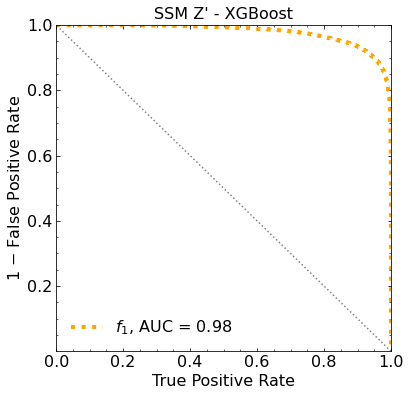

In [26]:
# XGBoost with only the kinematic variables of the leptons

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_mon_train,y_mon_train,eval_set=[(X_mon_train, y_mon_train), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg = classifier.predict_proba(X_mon_test).T[1]


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()

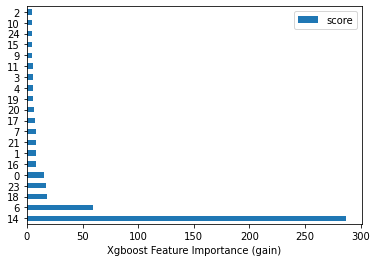

In [29]:
#keys = np.array(['b1-pt','b1-eta','b1-phi','b2-pt','b2-eta','b2-phi','tau-pt','tau-eta','tau-phi','MET-pt','MET-phi','HT-pt','num-jets','num-bjets'])

feature_important = classifier.get_booster().get_score(importance_type='gain')
values = list(feature_important.values())

data = pd.DataFrame(data=values, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh') ## plot top 20 features
plt.xlabel("Xgboost Feature Importance (gain)")
plt.show()

Classification score:


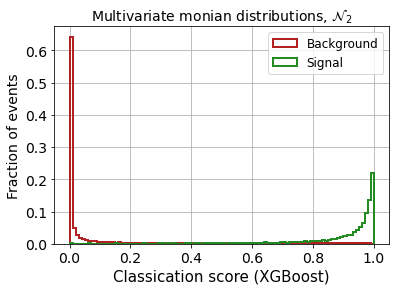

In [27]:
# XGBoost

########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score:')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()

In [58]:
met_mas05 = X_mon_test[np.where(y_pred_xg > 0.5)[0], 14]
met_menos05 = X_mon_test[np.where(y_pred_xg < 0.5)[0], 14]

(array([2.629e+03, 2.178e+03, 1.280e+03, 6.550e+02, 2.650e+02, 1.210e+02,
        3.000e+01, 1.600e+01, 5.000e+00, 2.000e+00]),
 array([3.85783510e-04, 4.79825577e-02, 9.55793318e-02, 1.43176106e-01,
        1.90772880e-01, 2.38369654e-01, 2.85966429e-01, 3.33563203e-01,
        3.81159977e-01, 4.28756751e-01, 4.76353525e-01]),
 <BarContainer object of 10 artists>)

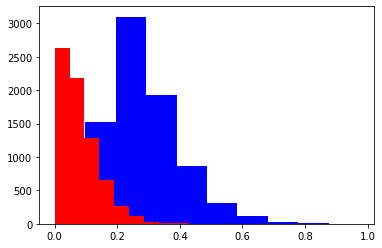

In [64]:
plt.hist(met_mas05, label = 'sg', color = 'blue')
plt.hist(met_menos05, label = 'bk', color = 'red')

## SIGNIFICANCE

### Working point

In [113]:
treshold=0.993


signalok = 0

for i in range(len(pred_XG_NP)):
    if pred_XG_NP[i] > treshold:
        signalok += 1
        
backok = 0

for i in range(len(pred_XG_SM)):
    if pred_XG_SM[i] > treshold:
        backok += 1  
        
#print(signalok)
#print(backok)

frac_sig = signalok / len(pred_XG_NP)
frac_bkg = backok / len(pred_XG_SM)

Sexp = 177.89*frac_sig#*(3000./139)
Bexp = 887878.90*frac_bkg#*(3000./139)

print('treshold: ', treshold)
print('Sexp: ', Sexp)
print('Bexp: ', Bexp)
print('SsqrtB: ', Sexp/(Bexp)**0.5)
print('Sig stat full: ', ( 2.* ( (Sexp+Bexp)*np.log(1 + (Sexp/Bexp) ) - Sexp ) )**0.5 )

treshold:  0.993
Sexp:  28.96155962095288
Bexp:  116.79543541173376
SsqrtB:  2.6798408964289635
Sig stat full:  2.5791733579939256


### Binned Likelihood Method

In [126]:
##############
# PARAMETERS #
##############

# requested number of ensembles
n_ensembles = 5000

# number of expected background events per ensemble
B_expected = 887878 # 753.8546015999999

S_expected = [170,178,180]



## LQ up 1400 GeV:
#S_expected = 7 # 6.6095293118432

# ratio S_expected/B_expected (signal ratio)
#SB_ratio = [0.0006, 0.001, 0.0016, 0.0025, 0.005, 0.0075, 0.01, 0.025]





# SOME USEFUL DERIVATED PARAMETERS:

# S/\sqrt{B}
SB_ratio = [ S_expected[iii]/(1.*B_expected) for iii in range(len(S_expected)) ]

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(S_expected)) ]

In [129]:
#################################
# BINNED POISSON LOG-LIKELIHOOD #
#################################

store_Z_bins_XG_16bins = []
store_Z_bins_XG_50bins = []
store_Z_bins_XG_100bins = []


for iii in range(len(S_expected)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't use an integer number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_events_back = N_ensembles_back * B_expected

    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]
    N_events_sig = N_ensembles_sig * S_expected[iii]
    
    
    
    ############
    # 16 bins #
    ############
    
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(16), range = [[0,1]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(16), range = [[0,1]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_16bins = ( 2* sum( ( (back_prom + sig_prom) * np.log( 1 + (sig_prom / back_prom) ) ) - sig_prom ) )**0.5
    #Z_bins_50bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_16bins.append(Z_bins_16bins)

    print('Z_bins_16bins : ', Z_bins_16bins)


    
    ############
    # 50 bins #
    ############
    
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(50), range = [[0,1]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(50), range = [[0,1]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_50bins = ( 2* sum( ( (back_prom + sig_prom) * np.log( 1 + (sig_prom / back_prom) ) ) - sig_prom ) )**0.5
    #Z_bins_50bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_50bins.append(Z_bins_50bins)

    print('Z_bins_50bins : ', Z_bins_50bins)
    
    
    ############
    # 100 bins #
    ############
    
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_100bins = ( 2* sum( ( (back_prom + sig_prom) * np.log( 1 + (sig_prom / back_prom) ) ) - sig_prom ) )**0.5
    #Z_bins_100bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_100bins.append(Z_bins_100bins)

    print('Z_bins_100bins : ', Z_bins_100bins)
    
    
    print('\n ----------------------------------- \n')

B_expected:  887878
S_expected:  170
S/$\sqrt{B}$:  0.18041484677857833
Z_bins_16bins :  1.0561474945373313
Z_bins_50bins :  1.4976285607736346
Z_bins_100bins :  1.8953076956544093

 ----------------------------------- 

B_expected:  887878
S_expected:  178
S/$\sqrt{B}$:  0.18890495721521733
Z_bins_16bins :  1.1057661968247527
Z_bins_50bins :  1.5677596551673558
Z_bins_100bins :  1.9835161092630562

 ----------------------------------- 

B_expected:  887878
S_expected:  180
S/$\sqrt{B}$:  0.19102748482437706
Z_bins_16bins :  1.1181697208209007
Z_bins_50bins :  1.5852876432217036
Z_bins_100bins :  2.0055548672221915

 ----------------------------------- 



In [130]:
print(store_Z_bins_XG_16bins)
print(store_Z_bins_XG_50bins)
print(store_Z_bins_XG_100bins)

[1.0561474945373313, 1.1057661968247527, 1.1181697208209007]
[1.4976285607736346, 1.5677596551673558, 1.5852876432217036]
[1.8953076956544093, 1.9835161092630562, 2.0055548672221915]


<ipython-input-135-edf59dc3b77c>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(S_expected, store_Z_bins_XG_16bins, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
<ipython-input-135-edf59dc3b77c>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(S_expected, store_Z_bins_XG_50bins, '-ok', color='blue', lw=lw, label=r'$o(x)$ BL (50 bins)')
<ipython-input-135-edf59dc3b77c>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(S_expected, store_Z_bins_XG_100bins, '-ok', color='dodgerblue', lw=lw, label=r'$o(x)$ BL (100 bins)')


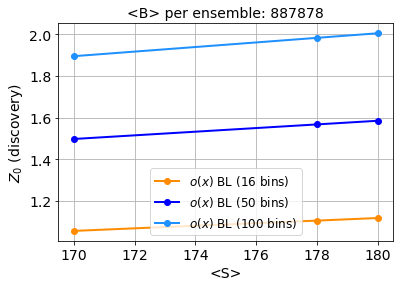

In [135]:
#########
# PLOTS #
#########

posX = []

for i in range(len(S_expected)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(S_expected, store_Z_bins_XG_16bins, '-ok', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)') 
plt.plot(S_expected, store_Z_bins_XG_50bins, '-ok', color='blue', lw=lw, label=r'$o(x)$ BL (50 bins)') 
plt.plot(S_expected, store_Z_bins_XG_100bins, '-ok', color='dodgerblue', lw=lw, label=r'$o(x)$ BL (100 bins)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('<S>', fontsize=14)
plt.ylabel('$Z_{0}$ (discovery)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(fontsize=12)
plt.show()

## PLOT THE DISTRIBUTIONS OF THE VARIABLES WE CONSIDER

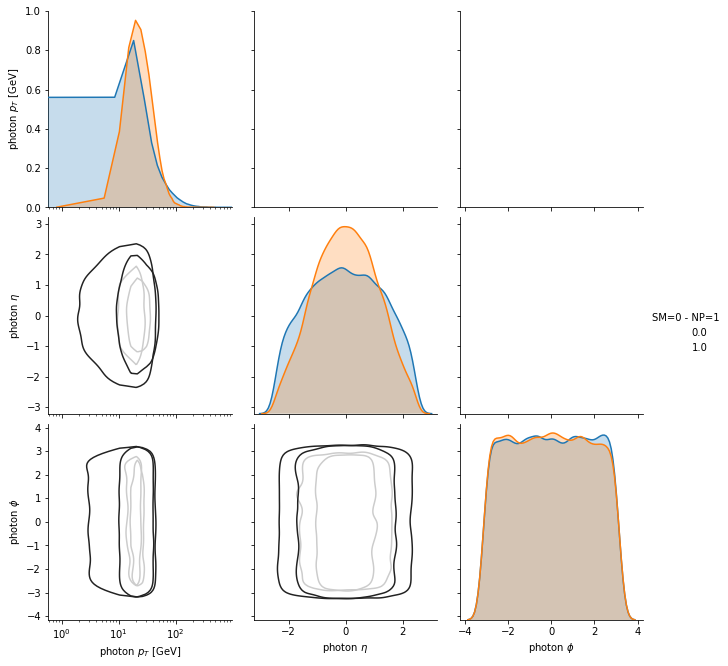

In [57]:
# g = sns.pairplot(df, hue="SM=0 - NP=1",
#                  x_vars=[lst[0],lst[1],lst[2]],
#                  y_vars=[lst[0],lst[1],lst[2]],
#                  corner=True)
#g.map_lower(sns.kdeplot, levels=4, color=".2")

g = sns.pairplot(df, hue="SM=0 - NP=1", height=3,
                 x_vars=[lst[0],lst[1],lst[2]],
                 y_vars=[lst[0],lst[1],lst[2]],
                 kind="kde")
g.map_lower(sns.kdeplot, levels=2, color="0.8")

log_columns = [lst[0]]

for ax in g.axes.flat:
    if ax.get_xlabel() in log_columns:
        ax.set(xscale="log")

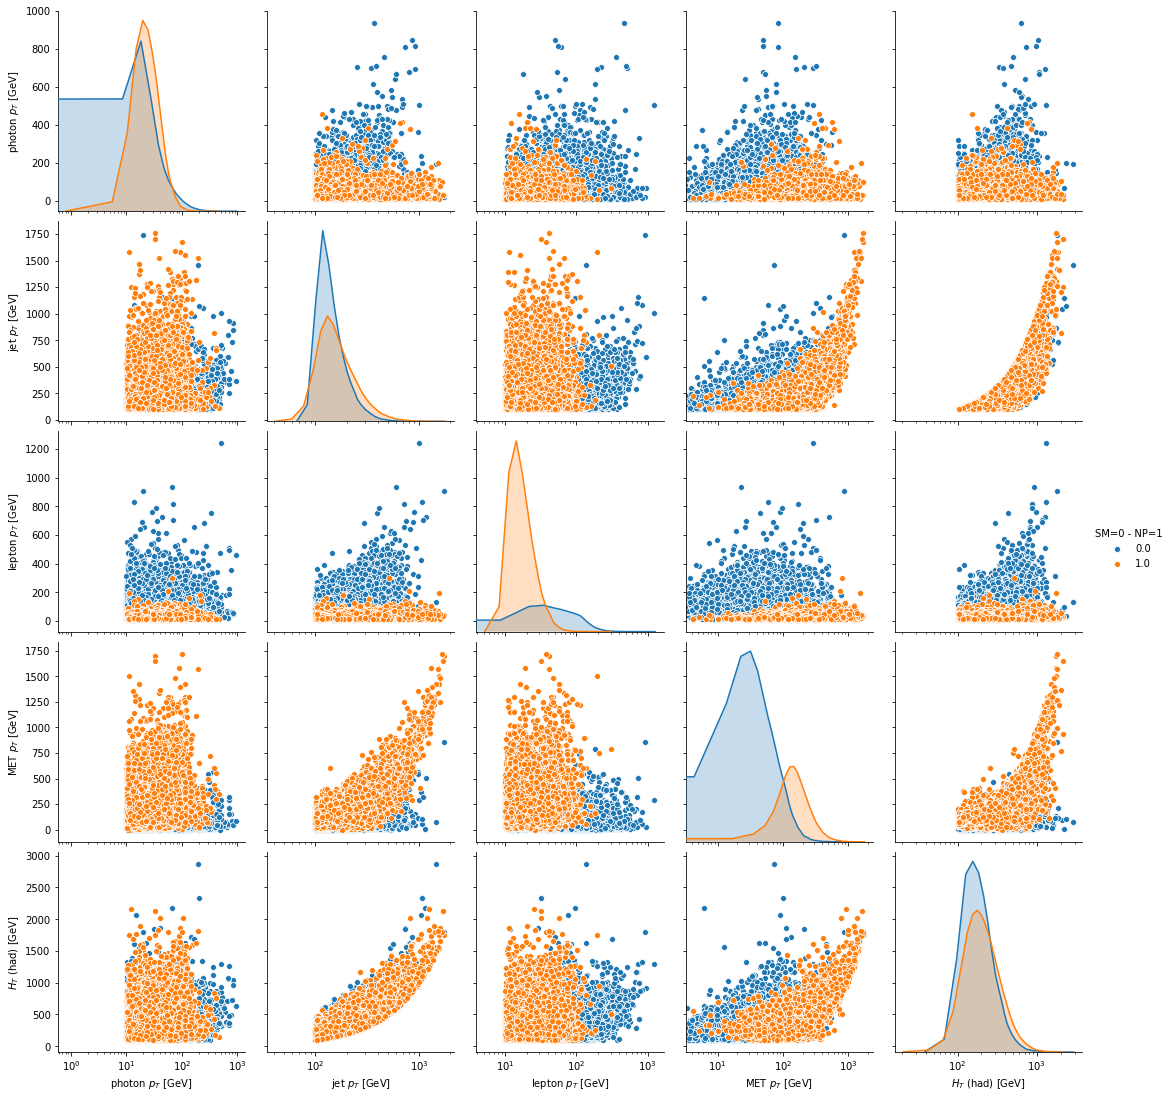

In [58]:

g = sns.pairplot(df, hue="SM=0 - NP=1", height=3,
                 x_vars=[lst[0],lst[3],lst[6],lst[9],lst[11]],
                 y_vars=[lst[0],lst[3],lst[6],lst[9],lst[11]])

log_columns = [lst[0],lst[3],lst[6],lst[9],lst[11]]

for ax in g.axes.flat:
    if ax.get_xlabel() in log_columns:
        ax.set(xscale="log")

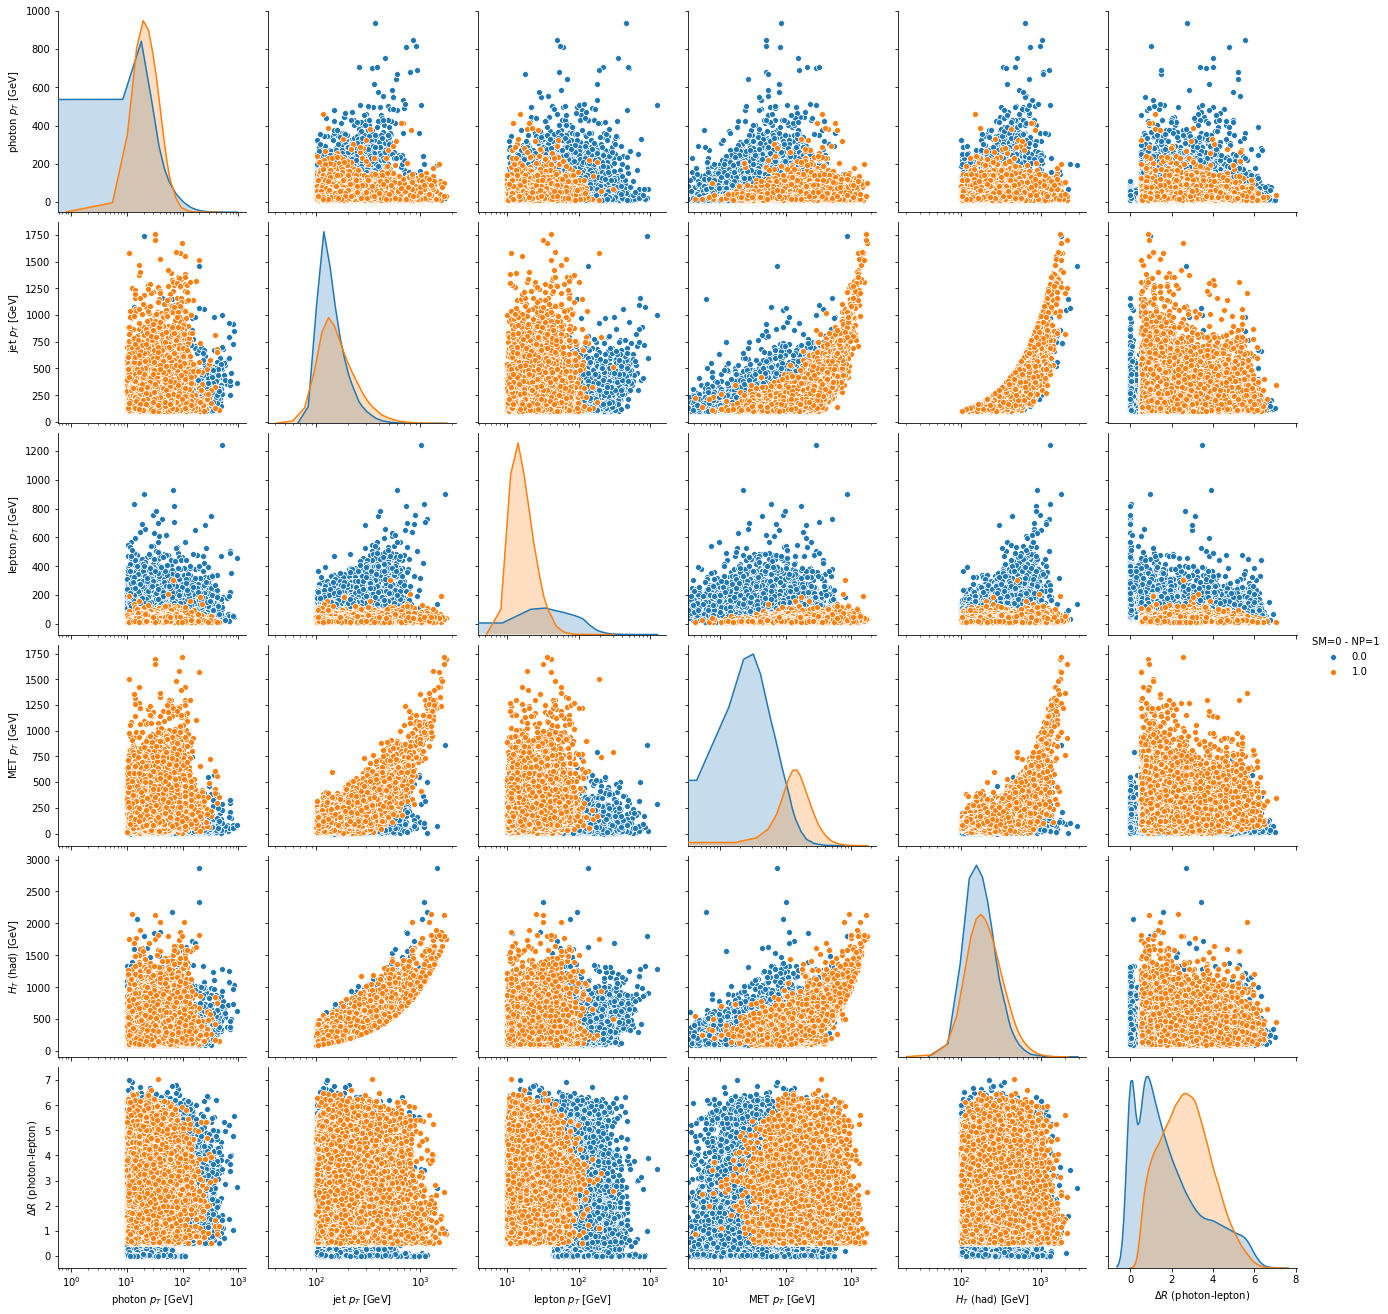

In [79]:

g = sns.pairplot(df, hue="SM=0 - NP=1", height=3,
                 x_vars=[lst[0],lst[3],lst[6],lst[9],lst[11],lst[23]],
                 y_vars=[lst[0],lst[3],lst[6],lst[9],lst[11],lst[23]])

log_columns = [lst[0],lst[3],lst[6],lst[9],lst[11]]

for ax in g.axes.flat:
    if ax.get_xlabel() in log_columns:
        ax.set(xscale="log")

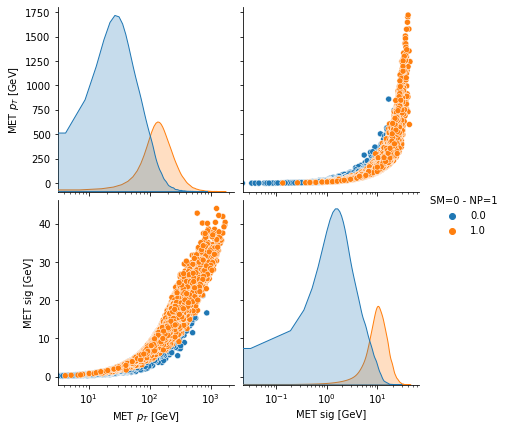

In [125]:

g = sns.pairplot(df, hue="SM=0 - NP=1", height=3,
                 x_vars=[lst[9],lst[14]],
                 y_vars=[lst[9],lst[14]])

log_columns = [lst[9],lst[14]]

for ax in g.axes.flat:
    if ax.get_xlabel() in log_columns:
        ax.set(xscale="log")

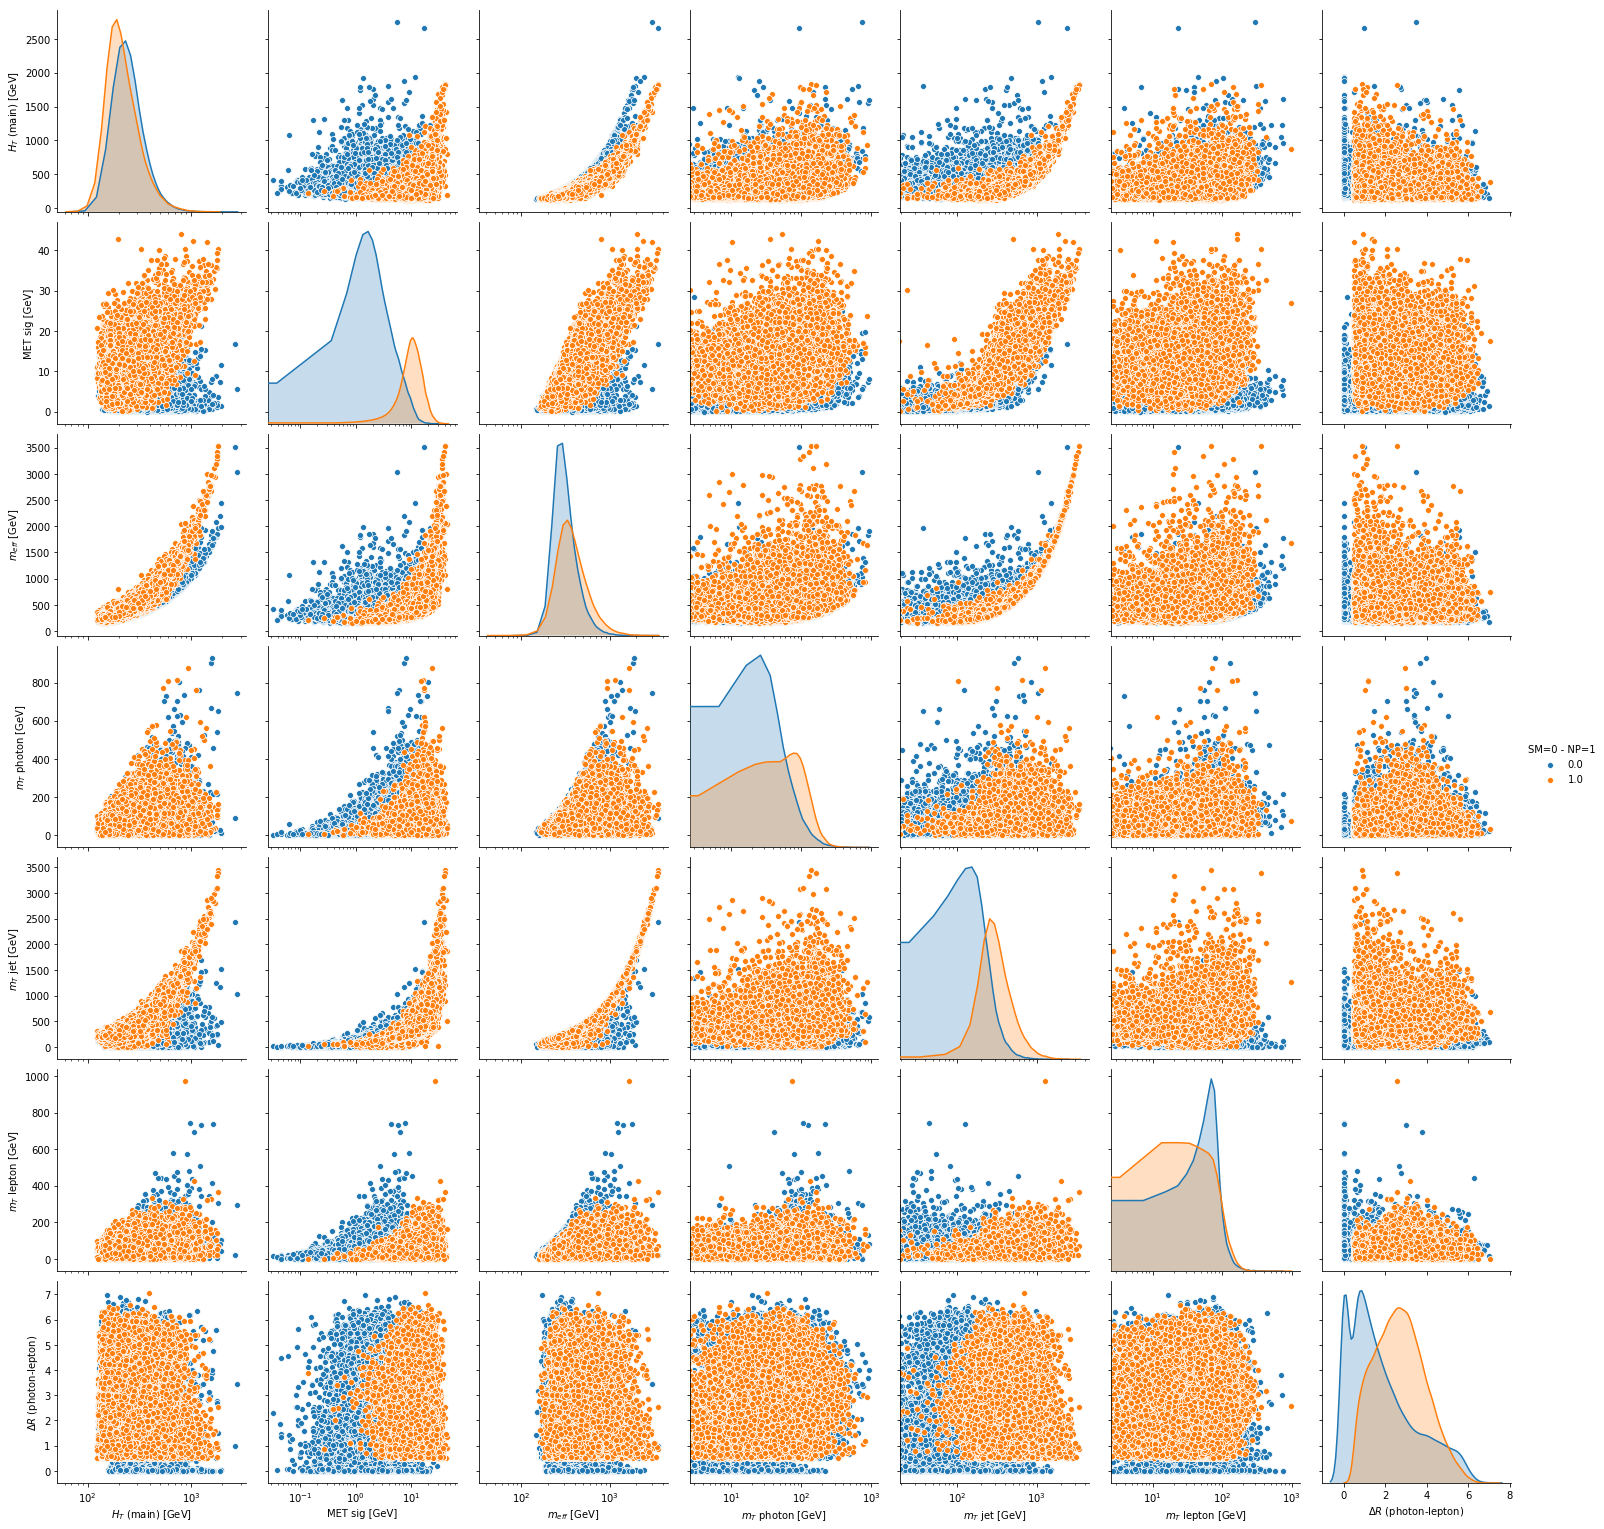

In [78]:

g = sns.pairplot(df, hue="SM=0 - NP=1", height=3,
                 x_vars=[lst[13],lst[14],lst[15],lst[16],lst[17],lst[18],lst[23]],
                 y_vars=[lst[13],lst[14],lst[15],lst[16],lst[17],lst[18],lst[23]])

log_columns = [lst[13],lst[14],lst[15],lst[16],lst[17],lst[18]]

for ax in g.axes.flat:
    if ax.get_xlabel() in log_columns:
        ax.set(xscale="log")

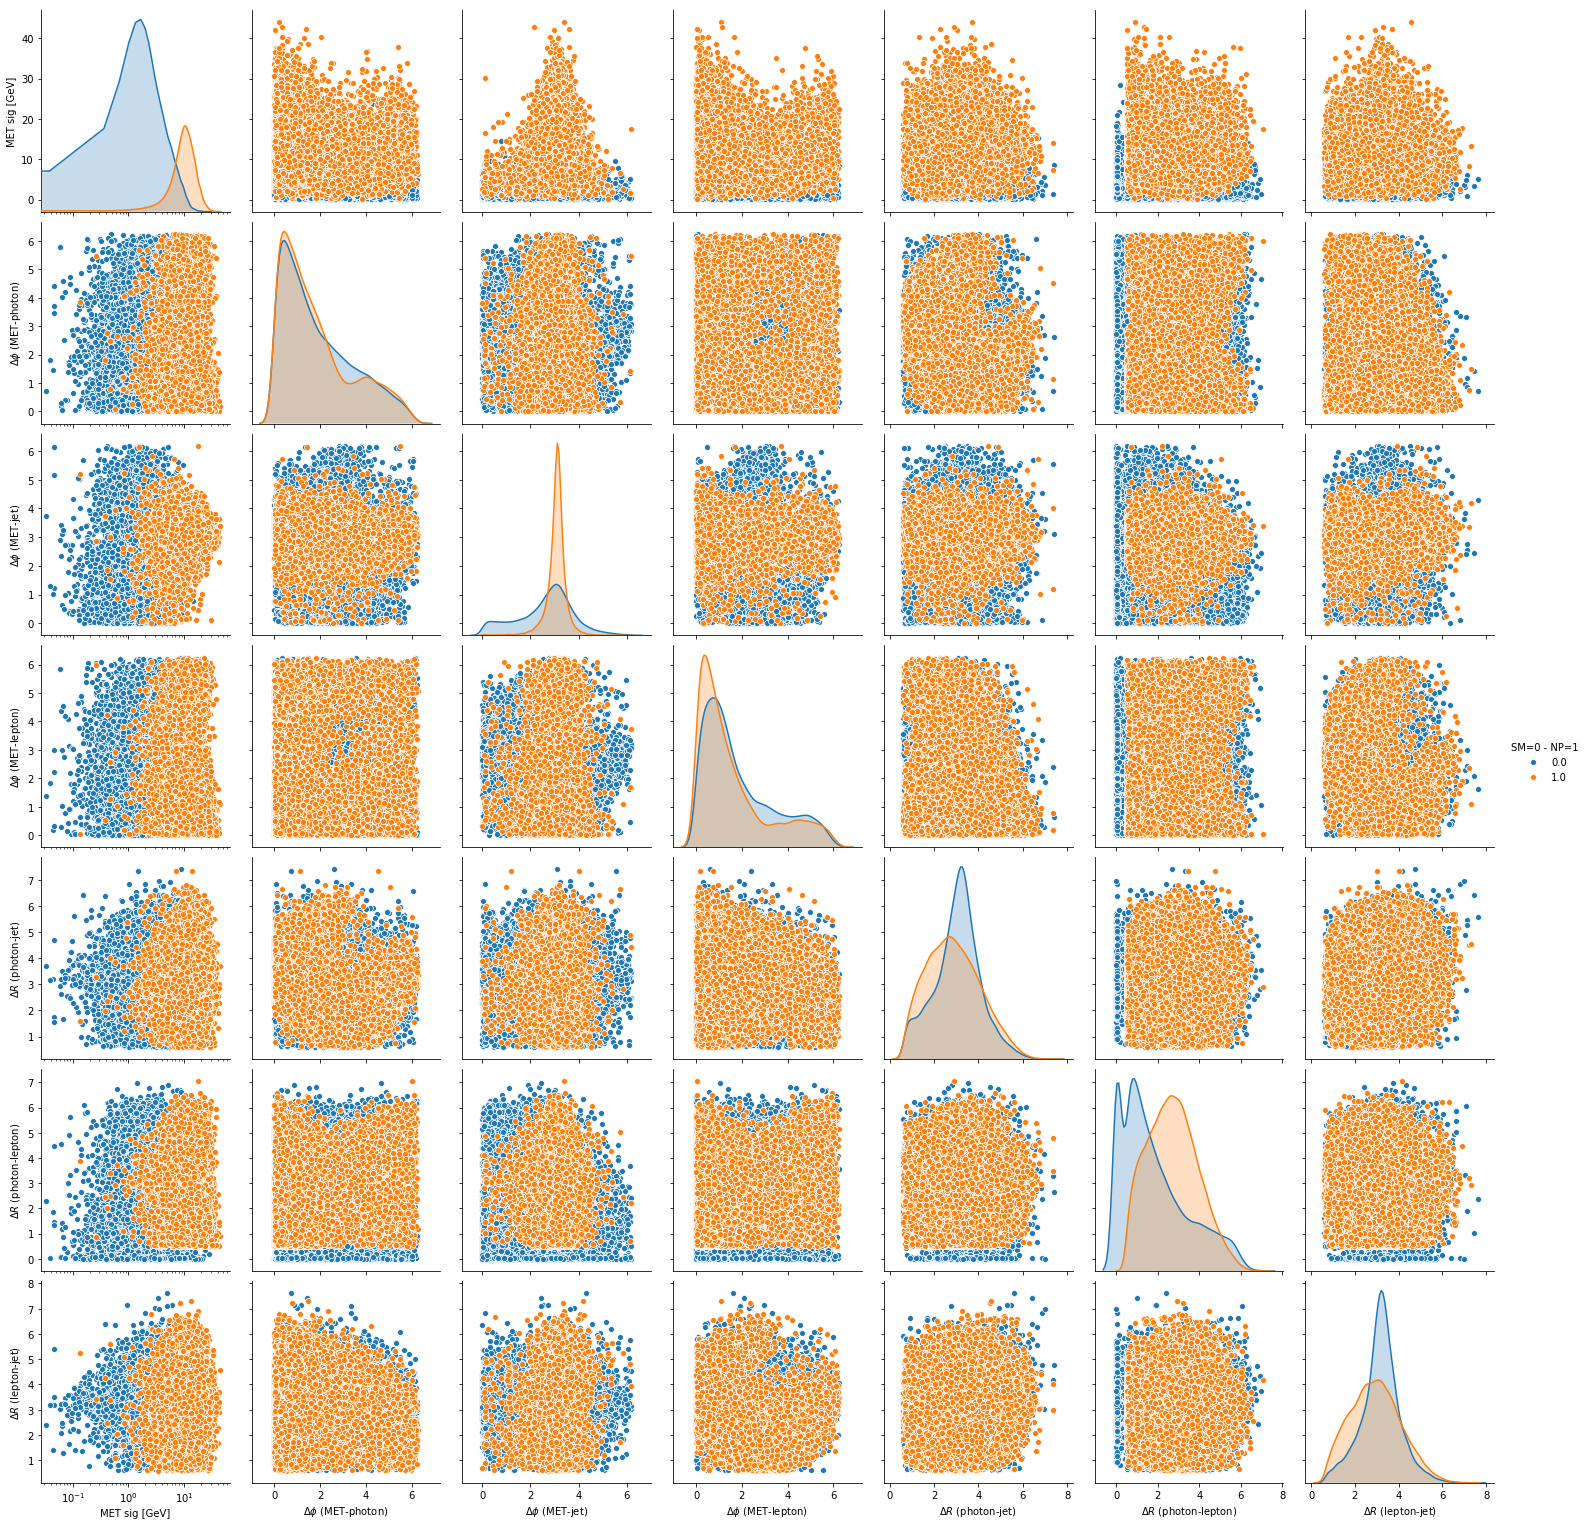

In [77]:

g = sns.pairplot(df, hue="SM=0 - NP=1", height=3,
                 x_vars=[lst[14],lst[19],lst[20],lst[21],lst[22],lst[23],lst[24]],
                 y_vars=[lst[14],lst[19],lst[20],lst[21],lst[22],lst[23],lst[24]])

#log_columns = [lst[13],lst[14],lst[15],lst[16],lst[17],lst[18]]

for ax in g.axes.flat:
    if ax.get_xlabel() in log_columns:
        ax.set(xscale="log")

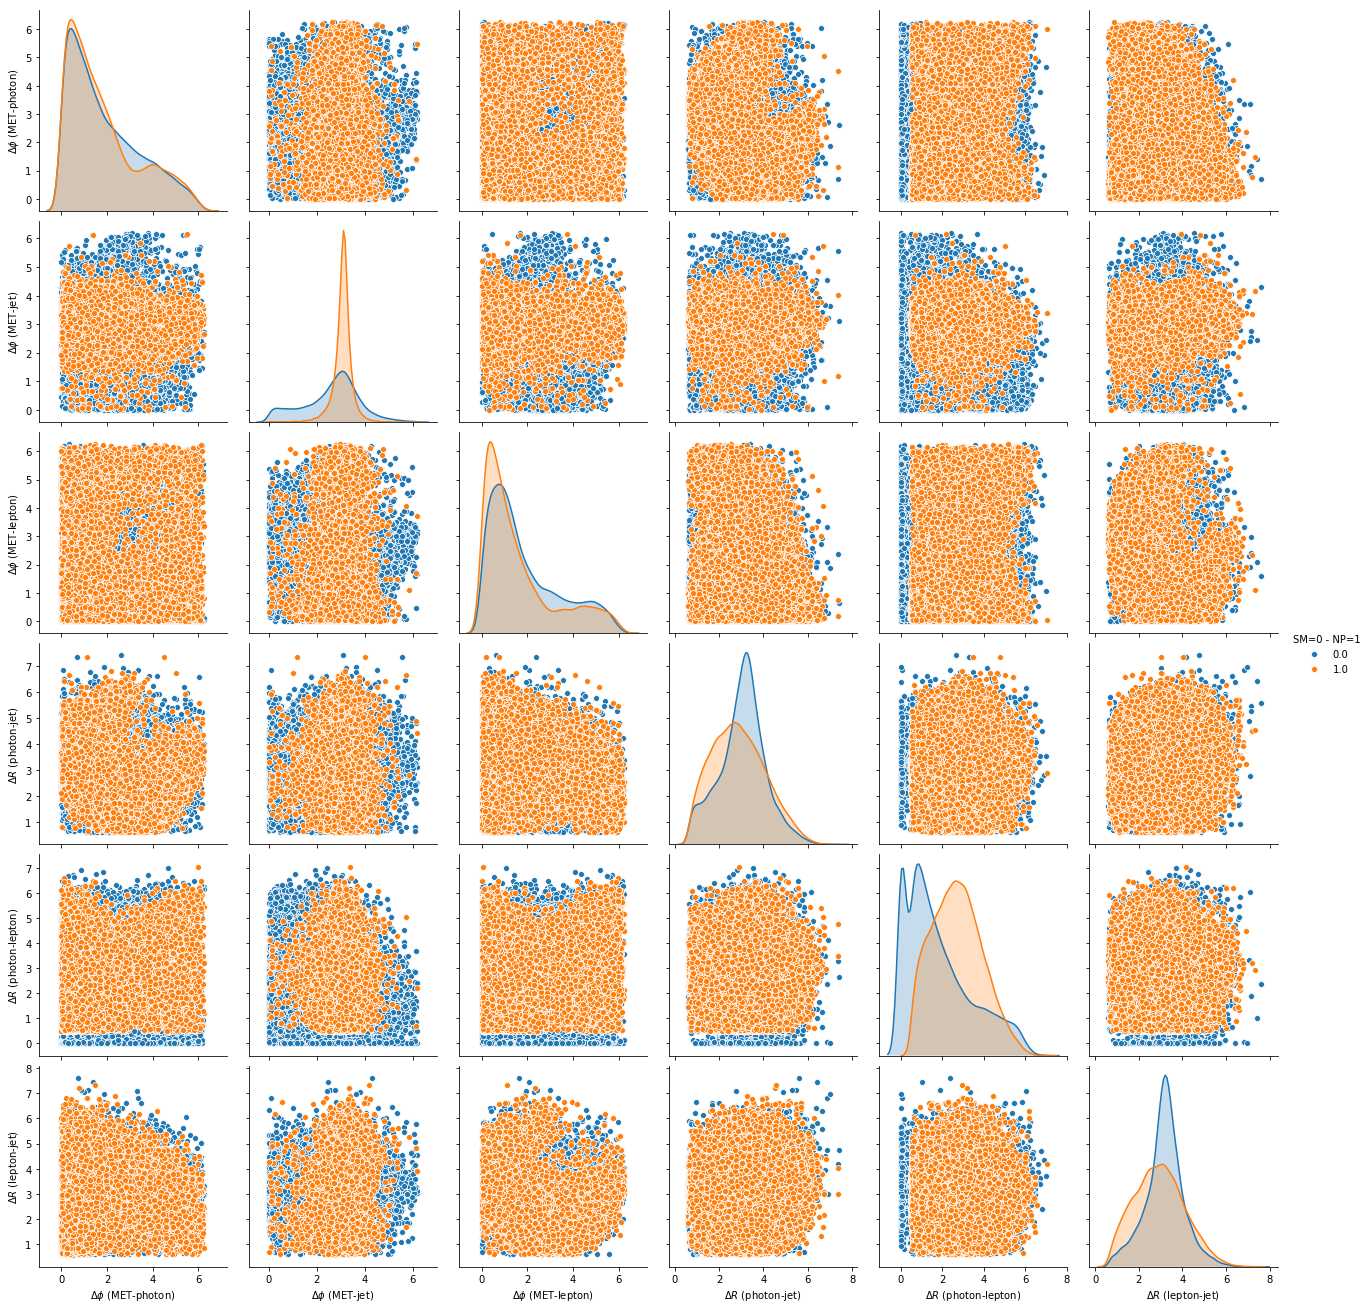

In [60]:
g = sns.pairplot(df, hue="SM=0 - NP=1", height=3,
                 x_vars=[lst[19],lst[20],lst[21],lst[22],lst[23],lst[24]],
                 y_vars=[lst[19],lst[20],lst[21],lst[22],lst[23],lst[24]])

### Distributions

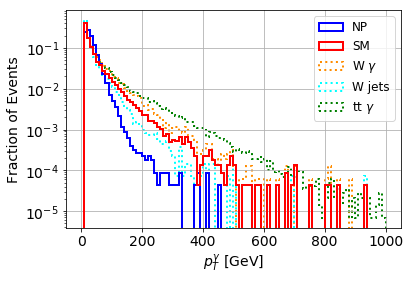

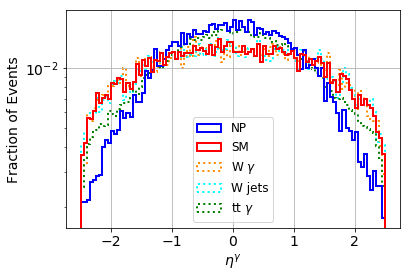

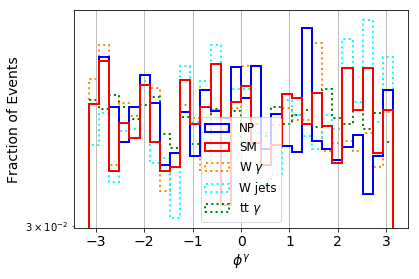

In [109]:
weights = np.ones_like(photon_NP[:,0])/len(photon_NP[:,0])
plt.hist(photon_NP[:,0], weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(photon_SM[:,0])/len(photon_SM[:,0])
plt.hist(photon_SM[:,0], weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(photon_Wgamma[:,0])/len(photon_Wgamma[:,0])
plt.hist(photon_Wgamma[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(photon_Wjet[:,0])/len(photon_Wjet[:,0])
#plt.hist(photon_Wjet[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(photon_Wjets[:,0])/len(photon_Wjets[:,0])
plt.hist(photon_Wjets[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(photon_ttgamma[:,0])/len(photon_ttgamma[:,0])
plt.hist(photon_ttgamma[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$p_T^{\gamma}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()




weights = np.ones_like(photon_NP[:,1])/len(photon_NP[:,1])
plt.hist(photon_NP[:,1], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(photon_SM[:,1])/len(photon_SM[:,1])
plt.hist(photon_SM[:,1], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(photon_Wgamma[:,1])/len(photon_Wgamma[:,1])
plt.hist(photon_Wgamma[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(photon_Wjet[:,1])/len(photon_Wjet[:,1])
#plt.hist(photon_Wjet[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(photon_Wjets[:,1])/len(photon_Wjets[:,1])
plt.hist(photon_Wjets[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(photon_ttgamma[:,1])/len(photon_ttgamma[:,1])
plt.hist(photon_ttgamma[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\eta^{\gamma}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()




weights = np.ones_like(photon_NP[:,2])/len(photon_NP[:,2])
plt.hist(photon_NP[:,2], weights=weights, bins=30, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(photon_SM[:,2])/len(photon_SM[:,2])
plt.hist(photon_SM[:,2], weights=weights, bins=30, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(photon_Wgamma[:,2])/len(photon_Wgamma[:,2])
plt.hist(photon_Wgamma[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(photon_Wjet[:,2])/len(photon_Wjet[:,2])
#plt.hist(photon_Wjet[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(photon_Wjets[:,2])/len(photon_Wjets[:,2])
plt.hist(photon_Wjets[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(photon_ttgamma[:,2])/len(photon_ttgamma[:,2])
plt.hist(photon_ttgamma[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\phi^{\gamma}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()

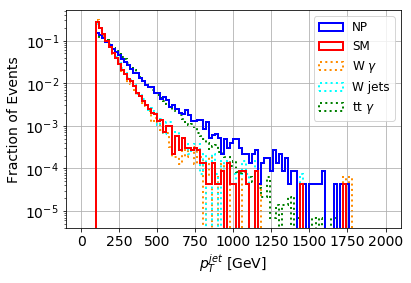

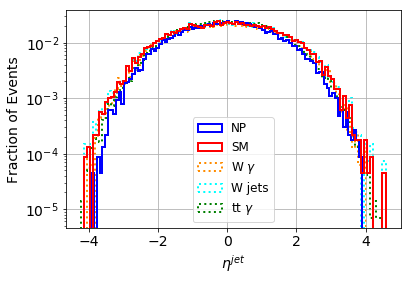

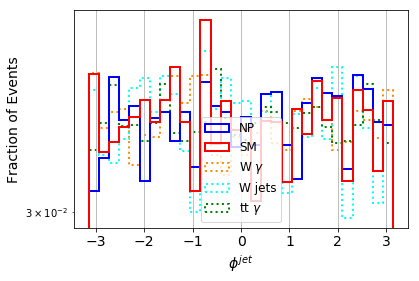

In [110]:
weights = np.ones_like(jet_NP[:,0])/len(jet_NP[:,0])
plt.hist(jet_NP[:,0], weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(jet_SM[:,0])/len(jet_SM[:,0])
plt.hist(jet_SM[:,0], weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(jet_Wgamma[:,0])/len(jet_Wgamma[:,0])
plt.hist(jet_Wgamma[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(jet_Wjet[:,0])/len(jet_Wjet[:,0])
#plt.hist(jet_Wjet[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(jet_Wjets[:,0])/len(jet_Wjets[:,0])
plt.hist(jet_Wjets[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(jet_ttgamma[:,0])/len(jet_ttgamma[:,0])
plt.hist(jet_ttgamma[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$p_T^{jet}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()




weights = np.ones_like(jet_NP[:,1])/len(jet_NP[:,1])
plt.hist(jet_NP[:,1], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(jet_SM[:,1])/len(jet_SM[:,1])
plt.hist(jet_SM[:,1], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(jet_Wgamma[:,1])/len(jet_Wgamma[:,1])
plt.hist(jet_Wgamma[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(jet_Wjet[:,1])/len(jet_Wjet[:,1])
#plt.hist(jet_Wjet[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(jet_Wjets[:,1])/len(jet_Wjets[:,1])
plt.hist(jet_Wjets[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(jet_ttgamma[:,1])/len(jet_ttgamma[:,1])
plt.hist(jet_ttgamma[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\eta^{jet}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()




weights = np.ones_like(jet_NP[:,2])/len(jet_NP[:,2])
plt.hist(jet_NP[:,2], weights=weights, bins=30, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(jet_SM[:,2])/len(jet_SM[:,2])
plt.hist(jet_SM[:,2], weights=weights, bins=30, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(jet_Wgamma[:,2])/len(jet_Wgamma[:,2])
plt.hist(jet_Wgamma[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(jet_Wjet[:,2])/len(jet_Wjet[:,2])
#plt.hist(jet_Wjet[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(jet_Wjets[:,2])/len(jet_Wjets[:,2])
plt.hist(jet_Wjets[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(jet_ttgamma[:,2])/len(jet_ttgamma[:,2])
plt.hist(jet_ttgamma[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\phi^{jet}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()

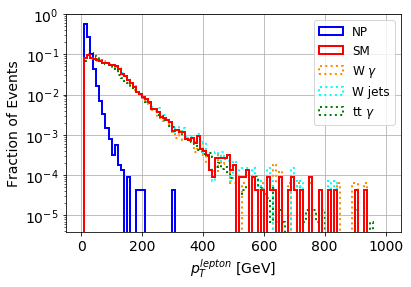

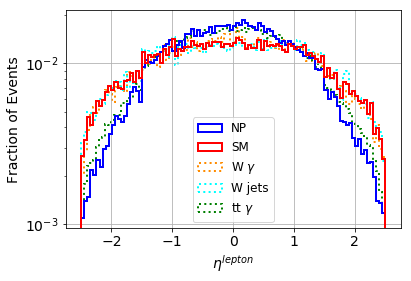

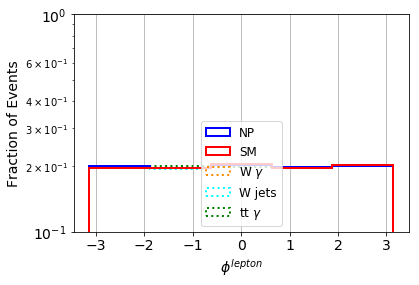

In [121]:
weights = np.ones_like(lepton_NP[:,0])/len(lepton_NP[:,0])
plt.hist(lepton_NP[:,0], weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(lepton_SM[:,0])/len(lepton_SM[:,0])
plt.hist(lepton_SM[:,0], weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(lepton_Wgamma[:,0])/len(lepton_Wgamma[:,0])
plt.hist(lepton_Wgamma[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(lepton_Wjet[:,0])/len(lepton_Wjet[:,0])
#plt.hist(lepton_Wjet[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(lepton_Wjets[:,0])/len(lepton_Wjets[:,0])
plt.hist(lepton_Wjets[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(lepton_ttgamma[:,0])/len(lepton_ttgamma[:,0])
plt.hist(lepton_ttgamma[:,0], weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$p_T^{lepton}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()




weights = np.ones_like(lepton_NP[:,1])/len(lepton_NP[:,1])
plt.hist(lepton_NP[:,1], weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(lepton_SM[:,1])/len(lepton_SM[:,1])
plt.hist(lepton_SM[:,1], weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(lepton_Wgamma[:,1])/len(lepton_Wgamma[:,1])
plt.hist(lepton_Wgamma[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(lepton_Wjet[:,1])/len(lepton_Wjet[:,1])
#plt.hist(lepton_Wjet[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(lepton_Wjets[:,1])/len(lepton_Wjets[:,1])
plt.hist(lepton_Wjets[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(lepton_ttgamma[:,1])/len(lepton_ttgamma[:,1])
plt.hist(lepton_ttgamma[:,1], weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\eta^{lepton}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()




weights = np.ones_like(lepton_NP[:,2])/len(lepton_NP[:,2])
plt.hist(lepton_NP[:,2], weights=weights, bins=5, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(lepton_SM[:,2])/len(lepton_SM[:,2])
plt.hist(lepton_SM[:,2], weights=weights, bins=5, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(lepton_Wgamma[:,2])/len(lepton_Wgamma[:,2])
plt.hist(lepton_Wgamma[:,2], weights=weights, bins=5, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(lepton_Wjet[:,2])/len(lepton_Wjet[:,2])
#plt.hist(lepton_Wjet[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(lepton_Wjets[:,2])/len(lepton_Wjets[:,2])
plt.hist(lepton_Wjets[:,2], weights=weights, bins=5, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(lepton_ttgamma[:,2])/len(lepton_ttgamma[:,2])
plt.hist(lepton_ttgamma[:,2], weights=weights, bins=5, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\phi^{lepton}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0.1,1)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()

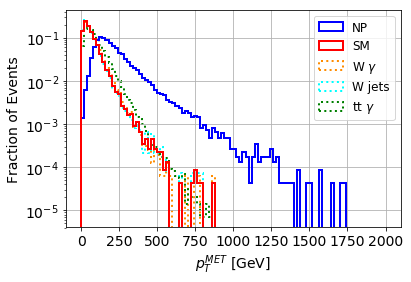

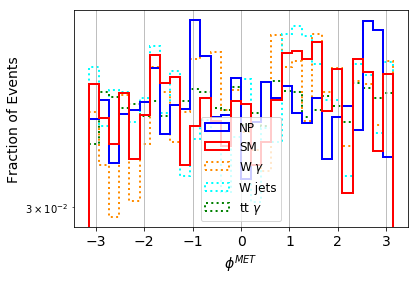

In [115]:
weights = np.ones_like(MET_NP[:,0])/len(MET_NP[:,0])
plt.hist(MET_NP[:,0], weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(MET_SM[:,0])/len(MET_SM[:,0])
plt.hist(MET_SM[:,0], weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(MET_Wgamma[:,0])/len(MET_Wgamma[:,0])
plt.hist(MET_Wgamma[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(MET_Wjet[:,0])/len(MET_Wjet[:,0])
#plt.hist(MET_Wjet[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(MET_Wjets[:,0])/len(MET_Wjets[:,0])
plt.hist(MET_Wjets[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(MET_ttgamma[:,0])/len(MET_ttgamma[:,0])
plt.hist(MET_ttgamma[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$p_T^{MET}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()




weights = np.ones_like(MET_NP[:,2])/len(MET_NP[:,2])
plt.hist(MET_NP[:,2], weights=weights, bins=30, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(MET_SM[:,2])/len(MET_SM[:,2])
plt.hist(MET_SM[:,2], weights=weights, bins=30, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(MET_Wgamma[:,2])/len(MET_Wgamma[:,2])
plt.hist(MET_Wgamma[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(MET_Wjet[:,2])/len(MET_Wjet[:,2])
#plt.hist(MET_Wjet[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(MET_Wjets[:,2])/len(MET_Wjets[:,2])
plt.hist(MET_Wjets[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(MET_ttgamma[:,2])/len(MET_ttgamma[:,2])
plt.hist(MET_ttgamma[:,2], weights=weights, bins=30, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\phi^{MET}$",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()

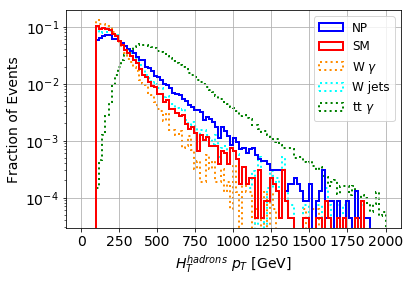

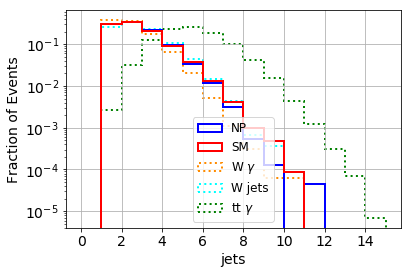

In [116]:
weights = np.ones_like(hadinfo_NP[:,0])/len(hadinfo_NP[:,0])
plt.hist(hadinfo_NP[:,0], weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(hadinfo_SM[:,0])/len(hadinfo_SM[:,0])
plt.hist(hadinfo_SM[:,0], weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(hadinfo_Wgamma[:,0])/len(hadinfo_Wgamma[:,0])
plt.hist(hadinfo_Wgamma[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(hadinfo_Wjet[:,0])/len(hadinfo_Wjet[:,0])
#plt.hist(hadinfo_Wjet[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(hadinfo_Wjets[:,0])/len(hadinfo_Wjets[:,0])
plt.hist(hadinfo_Wjets[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(hadinfo_ttgamma[:,0])/len(hadinfo_ttgamma[:,0])
plt.hist(hadinfo_ttgamma[:,0], weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$H_T^{hadrons}$ $p_T$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()




weights = np.ones_like(hadinfo_NP[:,1])/len(hadinfo_NP[:,1])
plt.hist(hadinfo_NP[:,1], weights=weights, bins=15, range=[0,15], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(hadinfo_SM[:,1])/len(hadinfo_SM[:,1])
plt.hist(hadinfo_SM[:,1], weights=weights, bins=15, range=[0,15], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(hadinfo_Wgamma[:,1])/len(hadinfo_Wgamma[:,1])
plt.hist(hadinfo_Wgamma[:,1], weights=weights, bins=15, range=[0,15], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(hadinfo_Wjet[:,1])/len(hadinfo_Wjet[:,1])
#plt.hist(hadinfo_Wjet[:,1], weights=weights, bins=15, range=[0,15], lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(hadinfo_Wjets[:,1])/len(hadinfo_Wjets[:,1])
plt.hist(hadinfo_Wjets[:,1], weights=weights, bins=15, range=[0,15], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(hadinfo_ttgamma[:,1])/len(hadinfo_ttgamma[:,1])
plt.hist(hadinfo_ttgamma[:,1], weights=weights, bins=15, range=[0,15], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"jets",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower center',fontsize=12)
plt.show()

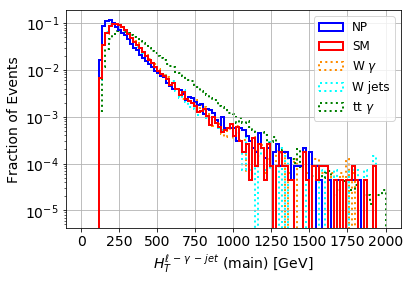

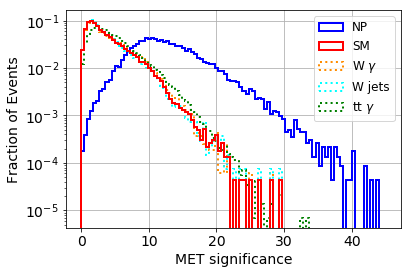

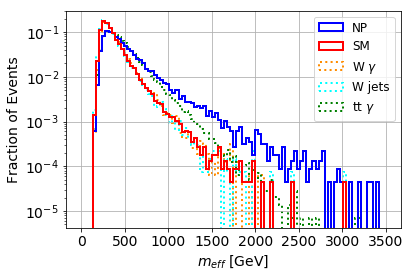

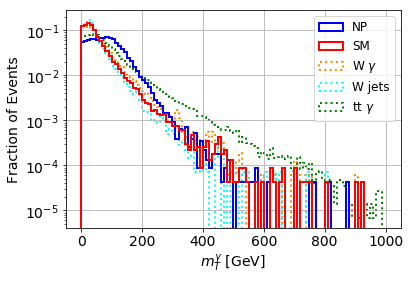

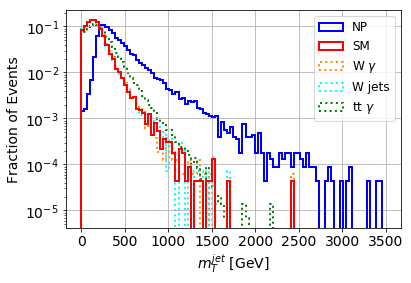

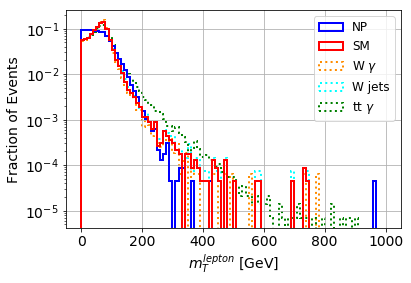

In [120]:
weights = np.ones_like(HT_main_NP)/len(HT_main_NP)
plt.hist(HT_main_NP, weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(HT_main_SM)/len(HT_main_SM)
plt.hist(HT_main_SM, weights=weights, bins=100, range=[0,2000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(HT_main_Wgamma)/len(HT_main_Wgamma)
plt.hist(HT_main_Wgamma, weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(HT_main_Wjet)/len(HT_main_Wjet)
#plt.hist(HT_main_Wjet, weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(HT_main_Wjets)/len(HT_main_Wjets)
plt.hist(HT_main_Wjets, weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(HT_main_ttgamma)/len(HT_main_ttgamma)
plt.hist(HT_main_ttgamma, weights=weights, bins=100, range=[0,2000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$H_T^{\ell \,-\, \gamma \,-\, jet}$ (main) [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()




weights = np.ones_like(MET_sig_NP)/len(MET_sig_NP)
plt.hist(MET_sig_NP, weights=weights, bins=100, range=[0,45], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(MET_sig_SM)/len(MET_sig_SM)
plt.hist(MET_sig_SM, weights=weights, bins=100, range=[0,45], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(MET_sig_Wgamma)/len(MET_sig_Wgamma)
plt.hist(MET_sig_Wgamma, weights=weights, bins=100, range=[0,45], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(MET_sig_Wjet)/len(MET_sig_Wjet)
#plt.hist(MET_sig_Wjet, weights=weights, bins=100, range=[0,45], lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(MET_sig_Wjets)/len(MET_sig_Wjets)
plt.hist(MET_sig_Wjets, weights=weights, bins=100, range=[0,45], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(MET_sig_ttgamma)/len(MET_sig_ttgamma)
plt.hist(MET_sig_ttgamma, weights=weights, bins=100, range=[0,45], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"MET significance",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()




weights = np.ones_like(m_eff_NP)/len(m_eff_NP)
plt.hist(m_eff_NP, weights=weights, bins=100, range=[0,3500], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(m_eff_SM)/len(m_eff_SM)
plt.hist(m_eff_SM, weights=weights, bins=100, range=[0,3500], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(m_eff_Wgamma)/len(m_eff_Wgamma)
plt.hist(m_eff_Wgamma, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(m_eff_Wjet)/len(m_eff_Wjet)
#plt.hist(m_eff_Wjet, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(m_eff_Wjets)/len(m_eff_Wjets)
plt.hist(m_eff_Wjets, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(m_eff_ttgamma)/len(m_eff_ttgamma)
plt.hist(m_eff_ttgamma, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$m_{eff}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()




weights = np.ones_like(mT_photon_NP)/len(mT_photon_NP)
plt.hist(mT_photon_NP, weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(mT_photon_SM)/len(mT_photon_SM)
plt.hist(mT_photon_SM, weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(mT_photon_Wgamma)/len(mT_photon_Wgamma)
plt.hist(mT_photon_Wgamma, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(mT_photon_Wjet)/len(mT_photon_Wjet)
#plt.hist(mT_photon_Wjet, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(mT_photon_Wjets)/len(mT_photon_Wjets)
plt.hist(mT_photon_Wjets, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(mT_photon_ttgamma)/len(mT_photon_ttgamma)
plt.hist(mT_photon_ttgamma, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$m_{T}^{\gamma}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()




weights = np.ones_like(mT_jet_NP)/len(mT_jet_NP)
plt.hist(mT_jet_NP, weights=weights, bins=100, range=[0,3500], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(mT_jet_SM)/len(mT_jet_SM)
plt.hist(mT_jet_SM, weights=weights, bins=100, range=[0,3500], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(mT_jet_Wgamma)/len(mT_jet_Wgamma)
plt.hist(mT_jet_Wgamma, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(mT_jet_Wjet)/len(mT_jet_Wjet)
#plt.hist(mT_jet_Wjet, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(mT_jet_Wjets)/len(mT_jet_Wjets)
plt.hist(mT_jet_Wjets, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(mT_jet_ttgamma)/len(mT_jet_ttgamma)
plt.hist(mT_jet_ttgamma, weights=weights, bins=100, range=[0,3500], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$m_{T}^{jet}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()




weights = np.ones_like(mT_lepton_NP)/len(mT_lepton_NP)
plt.hist(mT_lepton_NP, weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(mT_lepton_SM)/len(mT_lepton_SM)
plt.hist(mT_lepton_SM, weights=weights, bins=100, range=[0,1000], lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(mT_lepton_Wgamma)/len(mT_lepton_Wgamma)
plt.hist(mT_lepton_Wgamma, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(mT_lepton_Wjet)/len(mT_lepton_Wjet)
#plt.hist(mT_lepton_Wjet, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(mT_lepton_Wjets)/len(mT_lepton_Wjets)
plt.hist(mT_lepton_Wjets, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(mT_lepton_ttgamma)/len(mT_lepton_ttgamma)
plt.hist(mT_lepton_ttgamma, weights=weights, bins=100, range=[0,1000], lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$m_{T}^{lepton}$ [GeV]",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()

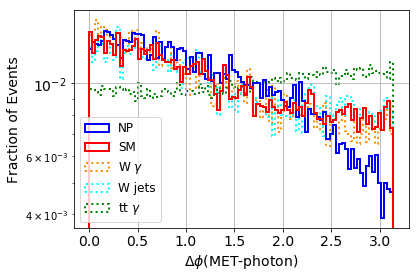

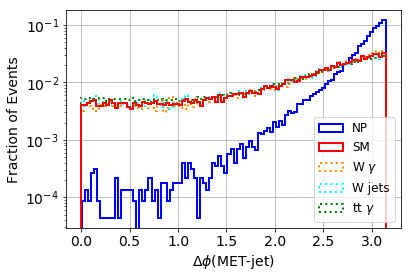

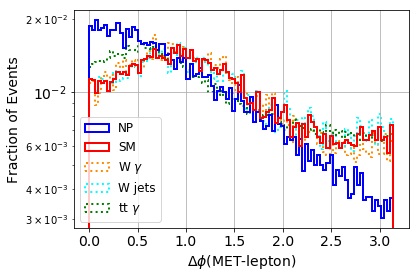

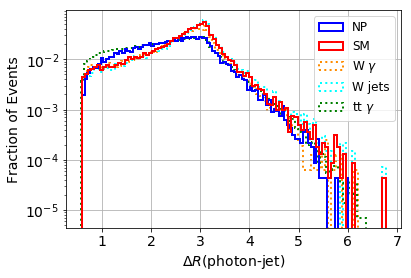

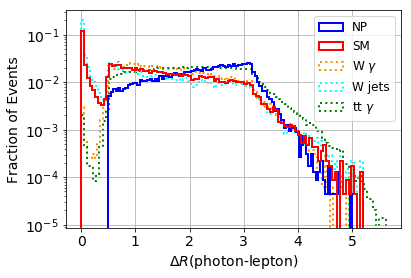

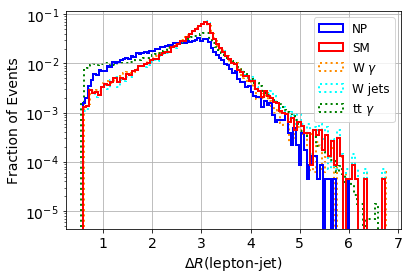

In [108]:
weights = np.ones_like(phi_MET_photon_NP)/len(phi_MET_photon_NP)
plt.hist(phi_MET_photon_NP, weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(phi_MET_photon_SM)/len(phi_MET_photon_SM)
plt.hist(phi_MET_photon_SM, weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(phi_MET_photon_Wgamma)/len(phi_MET_photon_Wgamma)
plt.hist(phi_MET_photon_Wgamma, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(phi_MET_photon_Wjet)/len(phi_MET_photon_Wjet)
#plt.hist(phi_MET_photon_Wjet, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(phi_MET_photon_Wjets)/len(phi_MET_photon_Wjets)
plt.hist(phi_MET_photon_Wjets, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(phi_MET_photon_ttgamma)/len(phi_MET_photon_ttgamma)
plt.hist(phi_MET_photon_ttgamma, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\Delta \phi$(MET-photon)",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower left',fontsize=12)
plt.show()




weights = np.ones_like(phi_MET_jet_NP)/len(phi_MET_jet_NP)
plt.hist(phi_MET_jet_NP, weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(phi_MET_jet_SM)/len(phi_MET_jet_SM)
plt.hist(phi_MET_jet_SM, weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(phi_MET_jet_Wgamma)/len(phi_MET_jet_Wgamma)
plt.hist(phi_MET_jet_Wgamma, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(phi_MET_jet_Wjet)/len(phi_MET_jet_Wjet)
#plt.hist(phi_MET_jet_Wjet, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(phi_MET_jet_Wjets)/len(phi_MET_jet_Wjets)
plt.hist(phi_MET_jet_Wjets, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(phi_MET_jet_ttgamma)/len(phi_MET_jet_ttgamma)
plt.hist(phi_MET_jet_ttgamma, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\Delta \phi$(MET-jet)",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right',fontsize=12)
plt.show()




weights = np.ones_like(phi_MET_lepton_NP)/len(phi_MET_lepton_NP)
plt.hist(phi_MET_lepton_NP, weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(phi_MET_lepton_SM)/len(phi_MET_lepton_SM)
plt.hist(phi_MET_lepton_SM, weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(phi_MET_lepton_Wgamma)/len(phi_MET_lepton_Wgamma)
plt.hist(phi_MET_lepton_Wgamma, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(phi_MET_lepton_Wjet)/len(phi_MET_lepton_Wjet)
#plt.hist(phi_MET_lepton_Wjet, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(phi_MET_lepton_Wjets)/len(phi_MET_lepton_Wjets)
plt.hist(phi_MET_lepton_Wjets, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(phi_MET_lepton_ttgamma)/len(phi_MET_lepton_ttgamma)
plt.hist(phi_MET_lepton_ttgamma, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\Delta \phi$(MET-lepton)",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower left',fontsize=12)
plt.show()




weights = np.ones_like(deltaR_photon_jet_NP)/len(deltaR_photon_jet_NP)
plt.hist(deltaR_photon_jet_NP, weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(deltaR_photon_jet_SM)/len(deltaR_photon_jet_SM)
plt.hist(deltaR_photon_jet_SM, weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(deltaR_photon_jet_Wgamma)/len(deltaR_photon_jet_Wgamma)
plt.hist(deltaR_photon_jet_Wgamma, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(deltaR_photon_jet_Wjet)/len(deltaR_photon_jet_Wjet)
#plt.hist(deltaR_photon_jet_Wjet, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(deltaR_photon_jet_Wjets)/len(deltaR_photon_jet_Wjets)
plt.hist(deltaR_photon_jet_Wjets, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(deltaR_photon_jet_ttgamma)/len(deltaR_photon_jet_ttgamma)
plt.hist(deltaR_photon_jet_ttgamma, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\Delta R$(photon-jet)",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()




weights = np.ones_like(deltaR_photon_lepton_NP)/len(deltaR_photon_lepton_NP)
plt.hist(deltaR_photon_lepton_NP, weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(deltaR_photon_lepton_SM)/len(deltaR_photon_lepton_SM)
plt.hist(deltaR_photon_lepton_SM, weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(deltaR_photon_lepton_Wgamma)/len(deltaR_photon_lepton_Wgamma)
plt.hist(deltaR_photon_lepton_Wgamma, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(deltaR_photon_lepton_Wjet)/len(deltaR_photon_lepton_Wjet)
#plt.hist(deltaR_photon_lepton_Wjet, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(deltaR_photon_lepton_Wjets)/len(deltaR_photon_lepton_Wjets)
plt.hist(deltaR_photon_lepton_Wjets, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(deltaR_photon_lepton_ttgamma)/len(deltaR_photon_lepton_ttgamma)
plt.hist(deltaR_photon_lepton_ttgamma, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\Delta R$(photon-lepton)",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()




weights = np.ones_like(deltaR_lepton_jet_NP)/len(deltaR_lepton_jet_NP)
plt.hist(deltaR_lepton_jet_NP, weights=weights, bins=100, lw=2, edgecolor='blue', histtype='step', label="NP", zorder=2)
weights = np.ones_like(deltaR_lepton_jet_SM)/len(deltaR_lepton_jet_SM)
plt.hist(deltaR_lepton_jet_SM, weights=weights, bins=100, lw=2, edgecolor='red', histtype='step', label="SM", zorder=2)
weights = np.ones_like(deltaR_lepton_jet_Wgamma)/len(deltaR_lepton_jet_Wgamma)
plt.hist(deltaR_lepton_jet_Wgamma, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='darkorange', histtype='step', label=r"W $\gamma$")
#weights = np.ones_like(deltaR_lepton_jet_Wjet)/len(deltaR_lepton_jet_Wjet)
#plt.hist(deltaR_lepton_jet_Wjet, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='purple', histtype='step', label="W j")
weights = np.ones_like(deltaR_lepton_jet_Wjets)/len(deltaR_lepton_jet_Wjets)
plt.hist(deltaR_lepton_jet_Wjets, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='cyan', histtype='step', label="W jets")
weights = np.ones_like(deltaR_lepton_jet_ttgamma)/len(deltaR_lepton_jet_ttgamma)
plt.hist(deltaR_lepton_jet_ttgamma, weights=weights, bins=100, lw=2,linestyle='dotted', edgecolor='green', histtype='step', label="tt $\gamma$")

plt.grid()  # Add grid lines
#plt.title(title,fontsize=14)  # Titles etc
plt.xlabel(r"$\Delta R$(lepton-jet)",fontsize=14)
plt.ylabel("Fraction of Events",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right',fontsize=12)
plt.show()